In [1]:
# Імпорт бібліотек для обробки даних
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Імпорт бібліотек для моделювання
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Попередження про ігнорування
import warnings
warnings.filterwarnings('ignore')

## EDA з точки зору Дата Сайентиста

### Аналіз даних

In [2]:
# Завантаження даних
os.chdir('./')
data_types = {
    'age': 'int8', 'height_cm': 'int8', 'weight_kg': 'int8',
    'overall': 'int8', 'potential': 'int8', 
    'wage_eur': 'float32', 'value_eur': 'float32'
}
data = pd.read_csv('fifa_players.csv', low_memory=False)

In [3]:
# Перегляд перших 5 рядків
print(data.head())

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ... goalkeeping_diving  \
0       93         93   78000000.0  320000.0   34  

In [4]:
# Загальна інформація про датасет
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   player_url                   19239 non-null  object 
 2   short_name                   19239 non-null  object 
 3   long_name                    19239 non-null  object 
 4   player_positions             19239 non-null  object 
 5   overall                      19239 non-null  int64  
 6   potential                    19239 non-null  int64  
 7   value_eur                    19165 non-null  float64
 8   wage_eur                     19178 non-null  float64
 9   age                          19239 non-null  int64  
 10  dob                          19239 non-null  object 
 11  height_cm                    19239 non-null  int64  
 12  weight_kg                    19239 non-null  int64  
 13  club_position   

In [5]:
# Статистичні характеристики датасету
display(data.describe())

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [6]:
# Перевірка на наявність пропущених значень
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Пропущені значення у кожній колонці:")
print(missing_values)

Пропущені значення у кожній колонці:
nation_logo_url            18480
nation_jersey_number       18480
nation_position            18480
nation_team_id             18480
club_loaned_from           18137
                           ...  
goalkeeping_kicking            0
goalkeeping_reflexes           0
goalkeeping_positioning        0
player_face_url                0
nation_flag_url                0
Length: 80, dtype: int64


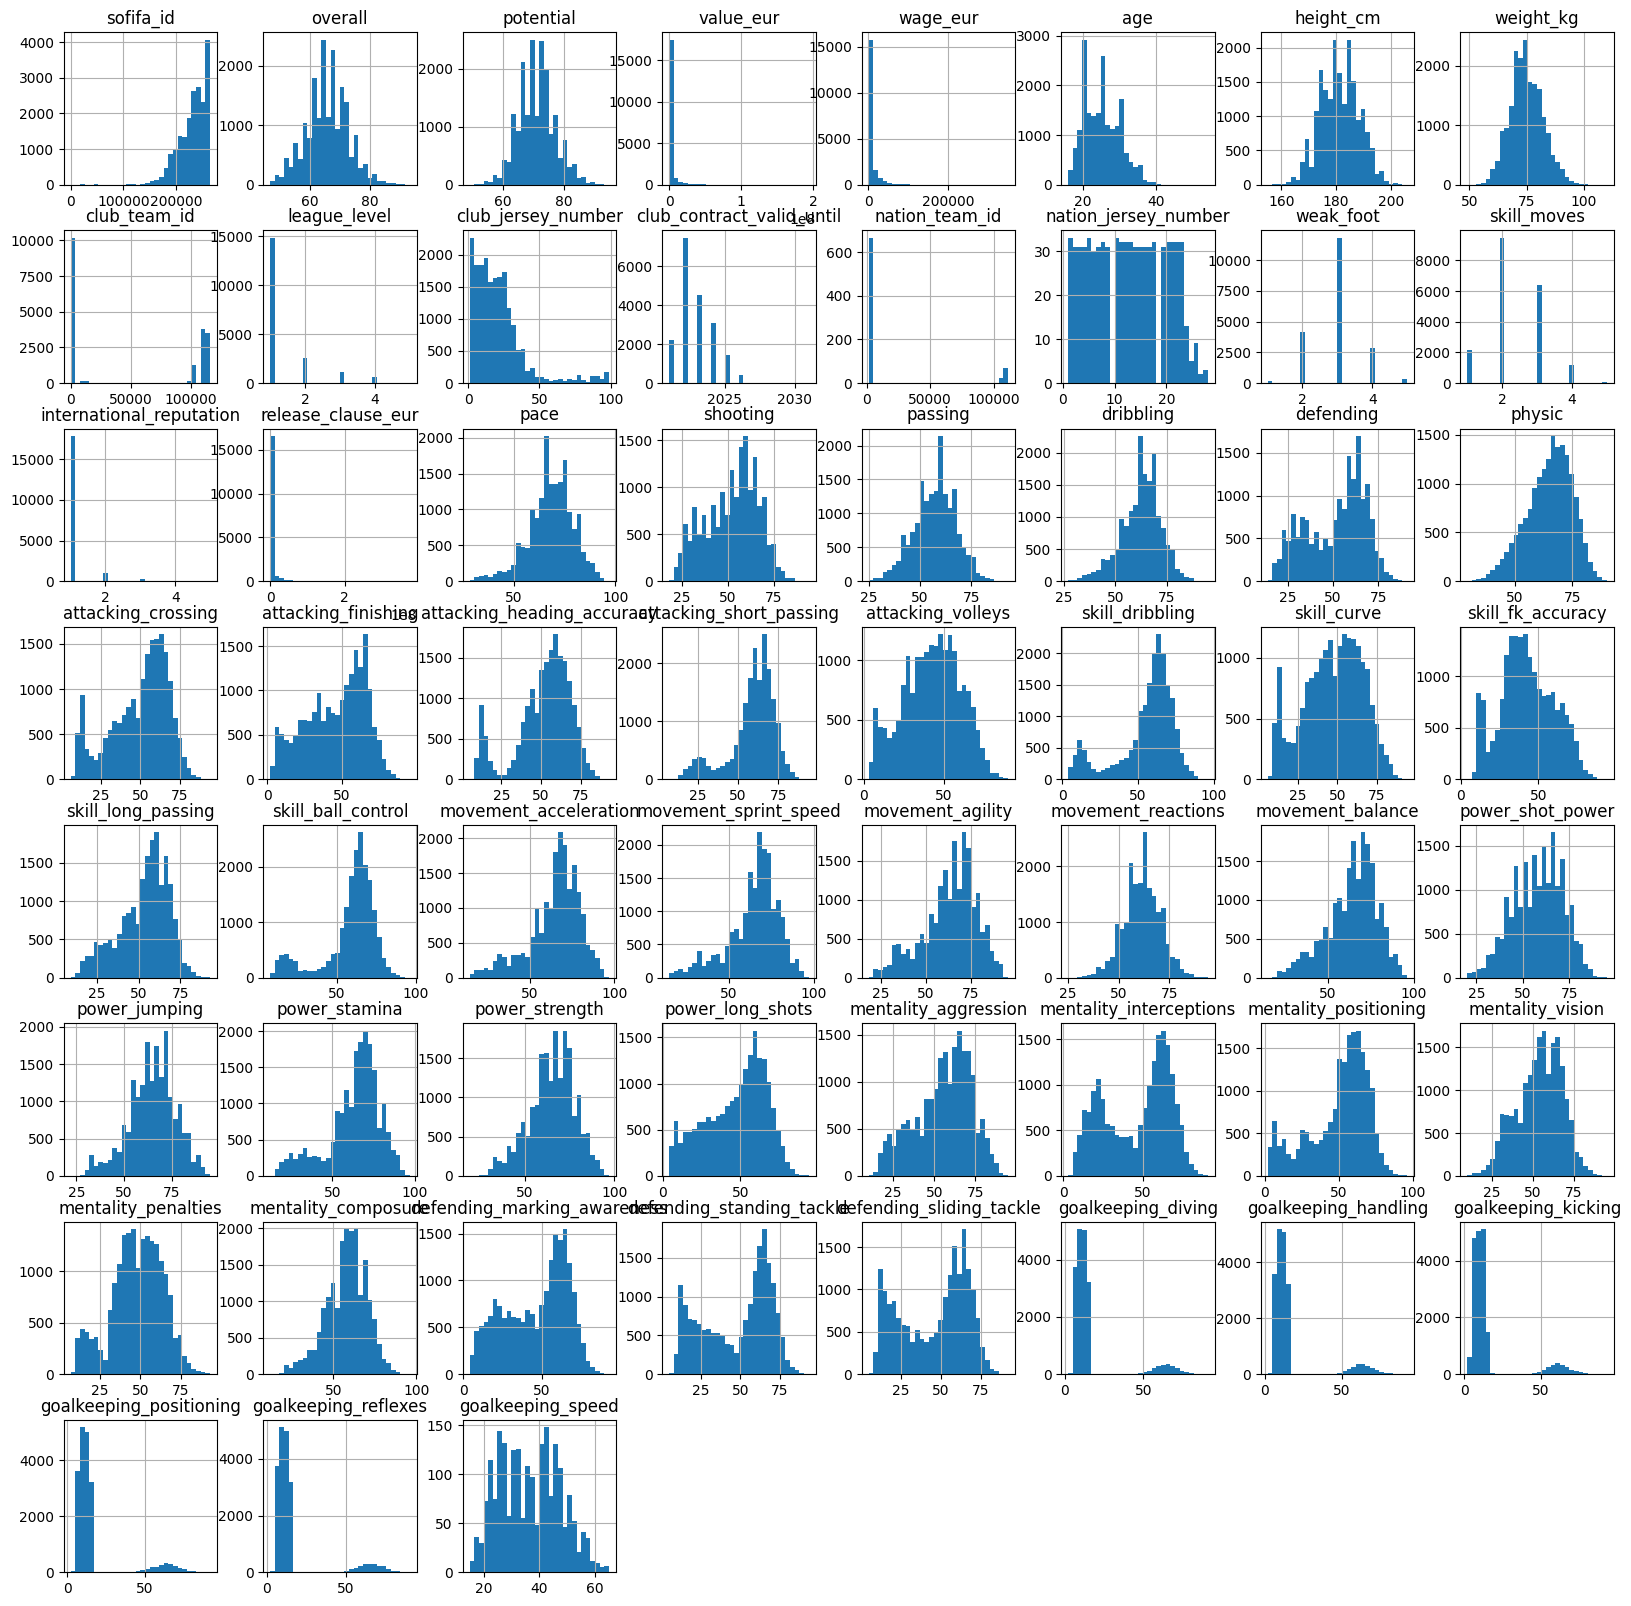

In [7]:
# Список числових колонок
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Перегляд розподілу числових змінних - це допоможе виявити аномалії та викиди в числових даних.
data[numeric_columns].hist(figsize=(20, 20), bins=30)
plt.show()

In [8]:
# Список категоріальних колонок
categorical_columns = data.select_dtypes(include=['object']).columns

# Перегляд унікальних значень у категоріальних колонках - це допоможе зрозуміти, які категорії є у кожній колонці та чи є дисбаланс у класах.
for col in categorical_columns:
    print(f"Колонка: {col}")
    print(data[col].value_counts())
    print("\n")

Колонка: player_url
player_url
https://sofifa.com/player/264540/emanuel-lalchhanchhuaha/220002       1
https://sofifa.com/player/158023/lionel-messi/220002                  1
https://sofifa.com/player/188545/robert-lewandowski/220002            1
https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/220002    1
https://sofifa.com/player/190871/neymar-da-silva-santos-jr/220002     1
                                                                     ..
https://sofifa.com/player/165153/karim-benzema/220002                 1
https://sofifa.com/player/215914/ngolo-kante/220002                   1
https://sofifa.com/player/202126/harry-kane/220002                    1
https://sofifa.com/player/192448/marc-andre-ter-stegen/220002         1
https://sofifa.com/player/167495/manuel-neuer/220002                  1
Name: count, Length: 19239, dtype: int64


Колонка: short_name
short_name
J. Rodríguez          13
J. Hernández           9
J. Brown               8
Paulinho               8
L. 

In [9]:
# Перевірка на наявність пропущених значень
missing_values = data.isna().sum().sort_values(ascending=False)

# Аналізуємо розподіл гравців по позиціяї
position_counts = data['player_positions'].value_counts()

# Перевіряємо наявність змішаних атрибутів (наприклад, атрибути воротарів для non-GKs)
non_gk = data[~data['player_positions'].str.contains('GK', na=False)]
gk_attributes = [
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]
non_gk_gk_attrs = non_gk[gk_attributes].sum(axis=1).gt(0).sum()

# Відобразимо EDA результати: пропущені значення, розподіл позицій та змішані атрибути
eda_summary = {
    'Total Missing Values': missing_values[missing_values > 0],
    'Position Distribution': position_counts,
    'Non-GKs with Goalkeeping Attributes': non_gk_gk_attrs
}

eda_summary

{'Total Missing Values': nation_logo_url              18480
 nation_jersey_number         18480
 nation_position              18480
 nation_team_id               18480
 club_loaned_from             18137
 player_tags                  17798
 goalkeeping_speed            17107
 player_traits                 9841
 dribbling                     2132
 passing                       2132
 pace                          2132
 shooting                      2132
 defending                     2132
 physic                        2132
 release_clause_eur            1176
 club_joined                   1163
 value_eur                       74
 league_level                    61
 league_name                     61
 club_contract_valid_until       61
 club_logo_url                   61
 club_name                       61
 club_team_id                    61
 club_jersey_number              61
 wage_eur                        61
 club_position                   61
 dtype: int64,
 'Position Distribution':

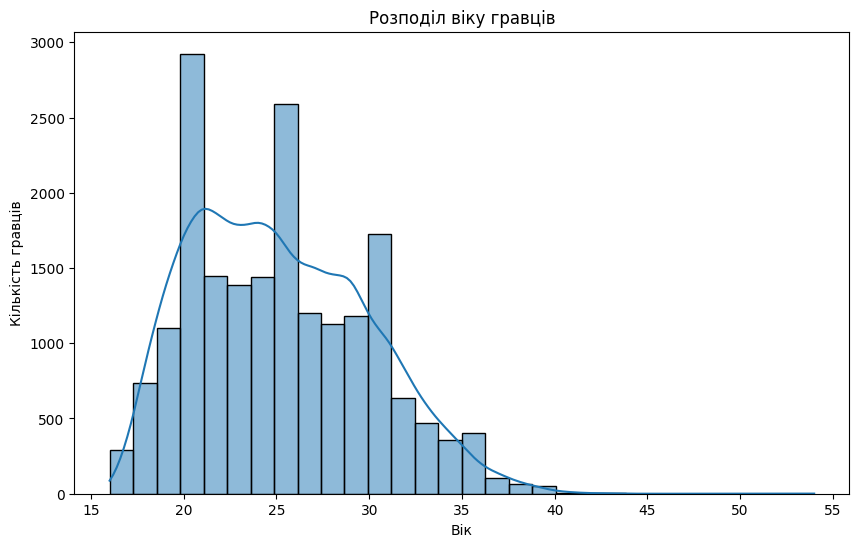

In [10]:
# Аналіз розподілу віку гравців
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Розподіл віку гравців')
plt.xlabel('Вік')
plt.ylabel('Кількість гравців')
plt.show()

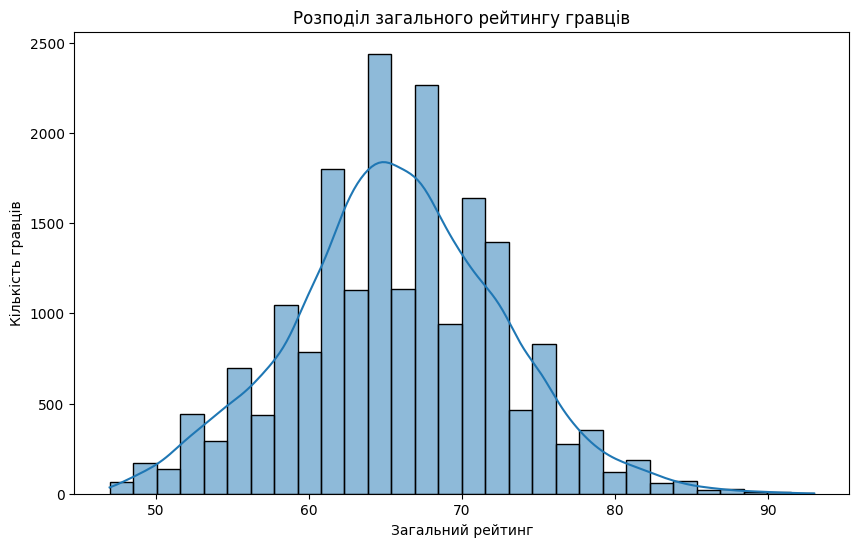

In [11]:
# Аналіз розподілу загального рейтингу гравців
plt.figure(figsize=(10, 6))
sns.histplot(data['overall'], bins=30, kde=True)
plt.title('Розподіл загального рейтингу гравців')
plt.xlabel('Загальний рейтинг')
plt.ylabel('Кількість гравців')
plt.show()

### Результати аналізу якості даних

#### 1. Структура датасету:
Всього: 19 239 рядків та 80 стовпців.
Деякі стовпці мають відсутні значення. Наприклад:
value_eur, wage_eur, club_position, nation_position та інші.
Типи даних: велика кількість числових (int64, float64) та строкових (object) стовпців.
Деякі стовпці містять змішані типи даних, що може свідчити про аномалії.

#### 2. Статистичні характеристики:
Середній вік гравців: 25 років.
Середній зріст: 181 см, вага — 75 кг.
Максимальний рейтинг гравця — 93.
Максимальна зарплата гравця — 350 000 євро.

#### 3. Пропущені значення:
Деякі стовпці мають велику кількість пропущених значень:
- nation_jersey_number, nation_logo_url, nation_position, nation_team_id: пропуски пов'язані з інформацією про національні команди. Це може бути обумовлено тим, що не всі гравці виступають за збірні.
- club_loaned_from: відсутні дані для гравців, які не перебувають в оренді.
- goalkeeping_speed — 17 107 пропущених значень, що може бути пов’язано з тим, що ця метрика є специфічною для воротарів.
- інші відсутні стовпці, такі як release_clause_eur та player_tags, можуть бути специфічними для певних гравців, що слід врахувати при подальшому аналізі.
- атрибути гравців (dribbling, passing, shooting, pace, physic, defending) мають 17107 непорожніх значень, що означає, що 2132 значень відсутні. Це швидше за все дані для воротарів, де ці показники не є значущими.
- атрибути, пов'язані з контрактами (value_eur, wage_eur, release_clause_eur, club_contract_valid_until, club_logo_url): Відсутні значення можуть свідчити про гравців без поточного контракту (вільних агентів).

#### 4. Проблеми з якістю даних:
- Числові колонки мають багато пустих чи нульових значень, що може призвести до помилок про формуванні фіч та прогнозів та, можливо, частина характеристик відповідає тільки окремому типу гравців. Також частина даних у колонках має бімодальний розподіл, що відповідає різним характеристикам гравців.
- Категоріальні колонки мають змішані дані, у деяких колонках декілька атрибутів, які варто більш детально дослідити. Воротарі мають вираженість по типам унікальних фіч і відсутності об'єднання з іншими позиціями у колонці player_positions.

### Усунення недоліків у даних
#### 1. Очистка та заповнення пропущених значень там, де це можливо.
#### 2. Обробка некоректних типів даних.
#### 3. Створення окремих датафреймів для аналізу специфічних позицій (наприклад, воротарів).

In [12]:
# Зменшення кількості дублів в іменах

# Функція для перетвореня імені
def convert_to_initials(name):
    parts = name.split()
    initials = [part[:3].capitalize() + '.' for part in parts[:-1]]
    last_name = parts[-1]
    return ' '.join(initials) + ' ' + last_name

# Застосування функції до імені
data['short_name'] = data['long_name'].apply(convert_to_initials)

In [13]:
# Підрахунок кількості дублів
duplicates = data['short_name'].value_counts()

# Виведення дублів, де кількість повторень більше 1
duplicates_more_than_one = duplicates[duplicates > 1]
print(duplicates_more_than_one)

short_name
Rhy. Williams        2
 李帅                  2
Mar. Müller          2
Kea. Baccus          2
Ibr. Baldé           2
Pab. Martinez        2
Mam. Fofana          2
Jac. Robinson        2
Dan. Johnson         2
Las. Coulibaly       2
Ibr. Sissoko         2
Mat. Smith           2
Sal. Sané            2
Mar. Mehlem          2
Gid. Mensah          2
Abd. Ba              2
Joe. Ward            2
Jos. Murphy          2
And. Hansen          2
Mar. Pašalić         2
 刘洋                  2
Lad. Krejčí          2
Ham. Traoré          2
Dan. Ward            2
Tol. Ciğerci         2
Ste. Savić           2
Joh. Russell         2
Ous. Ba              2
Ree. James           2
And. Oli. Silva      2
Bou. Fofana          2
Ibr. Cissé           2
Alf. Jones           2
Har. Singh           2
Ant. Papadopoulos    2
Abd. Al. Shammari    2
Bil. Brahimi         2
Ada. Fofana          2
Dom. Schmidt         2
Sam. Sissoko         2
Ous. Camara          2
Lal. Ralte           2
Ale. Johansson       2


In [14]:
# Видалення колонок з великою кількістю пропущених значень або непотрібною інформацією
columns_to_drop = [
    'sofifa_id', 'player_url', 'long_name', 'dob', 'club_team_id', 'club_loaned_from',
    'club_jersey_number', 'club_contract_valid_until', 'nation_team_id',
    'nation_jersey_number', 'player_tags', 'player_traits', 'player_face_url',
    'club_logo_url', 'nation_logo_url', 'nation_flag_url', 'real_face'
]
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Перевірка розмірів датасету після очищення
print("Розміри датасету після очищення:", data.shape)

Розміри датасету після очищення: (19239, 64)


In [15]:
# Пропущені зарплати, вартість переходу та виходу із збірної заповнимо на основі медіани у відповідних лігах, якщо інформація про лігу доступна
data['wage_eur'] = data['wage_eur'].fillna(data.groupby('league_name')['wage_eur'].transform('median'))
data['value_eur'] = data['value_eur'].fillna(data.groupby('league_name')['value_eur'].transform('median'))
data['release_clause_eur'] = data['release_clause_eur'].fillna(data.groupby('league_name')['release_clause_eur'].transform('median'))

In [16]:
# Обробка пропущених значень у навичках
# Список навичок польових гравців
field_skills = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle'
]

# Список навичок воротарів
goalkeeper_skills = [
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'
]

# Заповнюємо пропущені значення у польових гравців
data.loc[data['player_positions'] != 'GK', goalkeeper_skills] = data.loc[data['player_positions'] != 'GK', goalkeeper_skills].fillna(0)

# Заповнюємо пропущені значення у воротарів
data.loc[data['player_positions'] == 'GK', field_skills] = data.loc[data['player_positions'] == 'GK', field_skills].fillna(0)

# Перевірка наявності пропущених значень після обробки
print("Пропущені значення після обробки:")
print(data.isnull().sum().sort_values(ascending=False).head(10))

Пропущені значення після обробки:
nation_position       18480
club_joined            1163
wage_eur                 61
value_eur                61
club_name                61
club_position            61
league_name              61
league_level             61
release_clause_eur       61
height_cm                 0
dtype: int64


In [17]:
#Перевірка наявності дублікатів
duplicates_count = data.duplicated().sum()

#Перевірка на наявність аномалій у вікових та фізичних характеристиках
age_anomalies = data[(data['age'] < 16) | (data['age'] > 40)].shape[0]
height_anomalies = data[(data['height_cm'] < 150) | (data['height_cm'] > 210)].shape[0]
weight_anomalies = data[(data['weight_kg'] < 50) | (data['weight_kg'] > 120)].shape[0]

#Перегляд кількості гравців за основними позиціями
position_distribution = data['player_positions'].value_counts()

# Результати перевірки даних
cleaning_results = {
    "Number of Duplicates": duplicates_count,
    "Age Anomalies": age_anomalies,
    "Height Anomalies": height_anomalies,
    "Weight Anomalies": weight_anomalies,
    "Position Distribution": position_distribution
}

display(cleaning_results)

{'Number of Duplicates': np.int64(0),
 'Age Anomalies': 13,
 'Height Anomalies': 0,
 'Weight Anomalies': 1,
 'Position Distribution': player_positions
 CB             2423
 GK             2132
 ST             1770
 CDM, CM         953
 CM              726
                ... 
 CAM, LW, LB       1
 RWB, CDM          1
 LWB, CAM          1
 RB, CAM           1
 LM, LW, LB        1
 Name: count, Length: 674, dtype: int64}

In [18]:
# Розділення позицій на окремі категорії
data['player_positions_list'] = data['player_positions'].str.split(', ')

# Перетворення списку позицій у набір унікальних позицій
#unique_positions = set(pos for positions in data['player_positions_list'] for pos in positions)
#print(f"Унікальні позиції гравців: {unique_positions}")

# Визначення унікальних позицій для кожної колонки
player_unique_positions = set(pos for positions in data['player_positions_list'] for pos in positions)
club_position_unique = {pos for pos in data['club_position'].unique() if isinstance(pos, str) and pos.strip()}
nation_position_unique = {pos for pos in data['nation_position'].unique() if isinstance(pos, str) and pos.strip()}

# Створення загального набору унікальних позицій
overall_unique_positions = player_unique_positions.union(club_position_unique, nation_position_unique)

# Виведення результатів
"""unique_positions_dict = {
    'Унікальні позиції в player_positions': unique_positions,
    'Унікальні позиції в club_position': club_position_unique,
    'Унікальні позиції в nation_position': nation_position_unique,
    'Загальні унікальні позиції': overall_unique_positions
}

unique_positions_dict"""

unique_positions = pd.DataFrame({
    'Position Source': ['player_positions', 'club_position', 'nation_position', 'overall_unique'],
    'Unique Positions': [player_unique_positions, club_position_unique, nation_position_unique, overall_unique_positions]
})

display(unique_positions)

,Position Source,Unique Positions
0,player_positions,"{GK, CB, LW, CAM, LB, CF, LM, LWB, RWB, RB, ST..."
1,club_position,"{RCM, CB, RF, LB, LDM, LAM, LS, RB, RW, CDM, L..."
2,nation_position,"{RCM, RF, CB, LB, LDM, LAM, LS, RB, RW, CDM, L..."
3,overall_unique,"{RCM, CB, RF, LB, LDM, LAM, LS, RB, RW, CDM, L..."


In [19]:
# Перетворюємо всі позиції в загальний список для кожної унікальної позиції
all_unique_positions = sorted(list(overall_unique_positions))

# Створюємо DataFrame, де позиції є рядками, а булеві значення для кожної групи
positions_df = pd.DataFrame({
    'Unique Position': all_unique_positions,
    'player_positions': [pos in player_unique_positions for pos in all_unique_positions],  # Перевірка в унікальному наборі
    'club_position': [pos in club_position_unique for pos in all_unique_positions],
    'nation_position': [pos in nation_position_unique for pos in all_unique_positions]
})

# Відображаємо результат
display(positions_df.sort_values(by='Unique Position', ascending=True))

,Unique Position,player_positions,club_position,nation_position
0,CAM,True,True,True
1,CB,True,True,True
2,CDM,True,True,True
3,CF,True,True,True
4,CM,True,True,True
5,GK,True,True,True
6,LAM,False,True,True
7,LB,True,True,True
8,LCB,False,True,True
9,LCM,False,True,True


In [20]:
# Функція для визначення групи позицій
def position_group(position):
    if position in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
        return 'Defender'
    elif position in ['CAM', 'CDM', 'CM', 'LAM', 'LCM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
        return 'Midfielder'
    elif position in ['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST']:
        return 'Forward'
    elif position == 'GK':
        return 'Goalkeeper'
    else:
        return 'Other'

# Визначення основної позиції (першої в списку)
data['main_position'] = data['player_positions'].str.split(',').str[0].str.strip()
# Застосування функції до основної позиції
data['position_group'] = data['main_position'].apply(position_group)

# Застосування функції до національних та клубних позицій
data['club_position_group'] = data['club_position'].apply(lambda x: position_group(x) if pd.notna(x) else None)
data['nation_position_group'] = data['nation_position'].apply(lambda x: position_group(x) if pd.notna(x) else None)

In [21]:
# Фільтруємо лише колонки 'position_group', 'club_position_group', 'nation_position_group' з оригінального датасету і виконуємо підрахунок значень
filtered_columns = ['position_group', 'club_position_group', 'nation_position_group']

# Створюємо зведену таблицю тільки на основі зазначених колонок
summary_df = data[filtered_columns].apply(pd.Series.value_counts).fillna(0).astype(int)

# Відображаємо підсумкову таблицю для користувача
display(summary_df)

,position_group,club_position_group,nation_position_group
Defender,6394,2850,132
Forward,3680,1369,72
Goalkeeper,2132,701,33
Midfielder,7033,2791,126
Other,0,11467,396


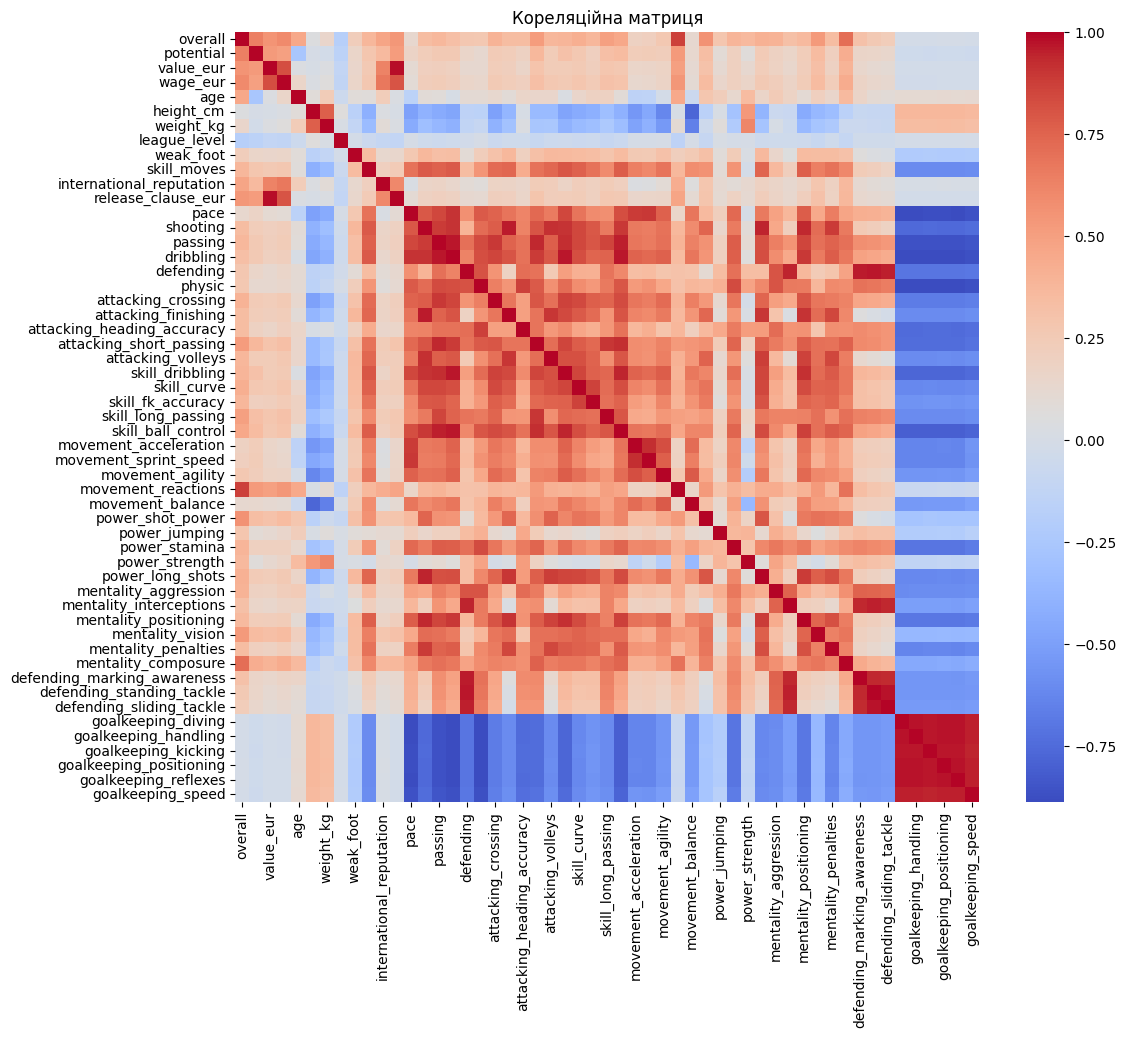

In [22]:
# Кореляційна матриця
plt.figure(figsize=(12, 10))
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()

#### Висока кореляція між ознаками може призвести до мультиколінеарності.
#### Можливо, потрібно буде видалити або об'єднати корельовані ознаки.

In [23]:
# Виявлення викидів у віці гравців
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print("Кількість викидів у віці гравців:", outliers.shape[0])

# Відображення списку імен і віку гравців-викидів
display(outliers[['short_name', 'age']].sort_values(by='age', ascending=False))

Кількість викидів у віці гравців: 6


,short_name,age
16209,三浦. 知良,54
388,Gia. Buffon,43
3105,Cri. Dav. Lucchetti,43
12245,中村. 俊輔,43
10042,Dan. Vac. Tasca,42
16505,Kev. Kei. Ellison,42


In [24]:
# Виявлення викидів у вазі гравців
q1 = data['weight_kg'].quantile(0.20)
q3 = data['weight_kg'].quantile(0.80)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_weight = data[(data['weight_kg'] < lower_bound) | (data['weight_kg'] > upper_bound)]
print("Кількість викидів у вазі гравців:", outliers_weight.shape[0])

# Відображення списку імен і віку гравців-викидів
display(outliers_weight[['short_name', 'weight_kg']].sort_values(by='weight_kg', ascending=False))

Кількість викидів у вазі гравців: 16


,short_name,weight_kg
9816,Sah. Ade. Akinfenwa,110
11107,Chr. Seitz,107
13773,Luk. Watkowiak,105
6902,Mam. Obb. Oularé,104
2064,Lar. Unnerstall,103
9929,Tom. Holý,102
1573,Bil. Abd. Hamid,102
12295,Eir. Hol. Johansen,102
1160,Asm. Begović,101
7251,Tom. Chorý,101


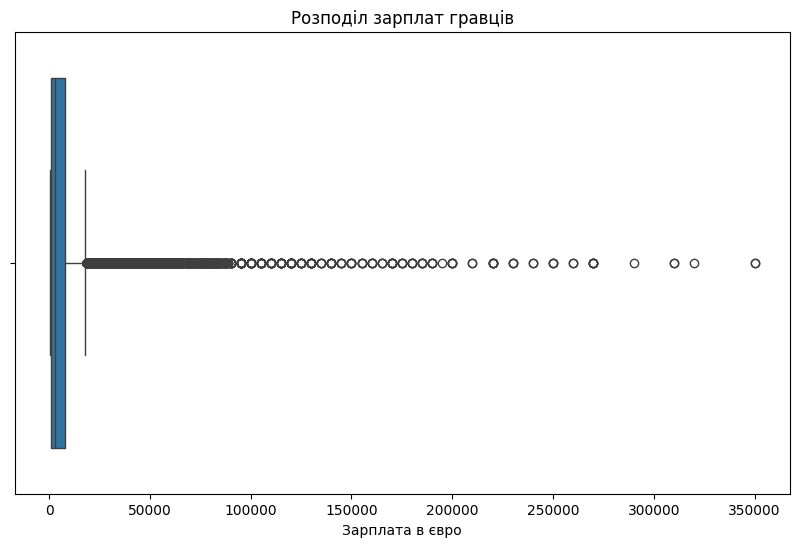

In [25]:
# Аналіз розподілу зарплат
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['wage_eur'])
plt.title('Розподіл зарплат гравців')
plt.xlabel('Зарплата в євро')
plt.show()

In [26]:
# Виявлення аномально високих зарплат
high_wages = data[data['wage_eur'] > data['wage_eur'].quantile(0.99)]
print("Кількість гравців з аномально високими зарплатами:", high_wages.shape[0])

# Відображення ТОП 10 гравців за зарплатами
display(high_wages[['short_name', 'club_name', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head(10))

Кількість гравців з аномально високими зарплатами: 191


,short_name,club_name,wage_eur
4,Kev. De. Bruyne,Manchester City,350000.0
11,Kar. Benzema,Real Madrid CF,350000.0
0,Lio. And. Mes. Cuccittini,Paris Saint-Germain,320000.0
14,Car. Hen. Ven. Casimiro,Real Madrid CF,310000.0
24,Ton. Kroos,Real Madrid CF,310000.0
27,Rah. Sterling,Manchester City,290000.0
3,Ney. Da. Sil. San. Júnior,Paris Saint-Germain,270000.0
17,Moh. Sal. Ghaly,Liverpool,270000.0
16,Sad. Mané,Liverpool,270000.0
2,Cri. Ron. Dos. San. Aveiro,Manchester United,270000.0


In [27]:
# Перевірка пропущених значень у навичках
skills_columns = field_skills + goalkeeper_skills
missing_skills = data[skills_columns].isnull().sum()
print("Пропущені значення у навичках:")
print(missing_skills[missing_skills > 0])

Пропущені значення у навичках:
Series([], dtype: int64)


In [28]:
# Видалення аномальних значень віку та ваги
data_cleaned = data[(data['age'] >= 16) & (data['age'] <= 40)]
data_cleaned = data_cleaned[(data_cleaned['weight_kg'] >= 50) & (data_cleaned['weight_kg'] <= 120)]

In [29]:
display(data_cleaned)

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_positions_list,main_position,position_group,club_position_group,nation_position_group
0,Lio. And. Mes. Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,RW,...,11,15,14,8,0.0,"[RW, ST, CF]",RW,Forward,Forward,Forward
1,Rob. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,ST,...,6,12,8,10,0.0,[ST],ST,Forward,Forward,Forward
2,Cri. Ron. Dos. San. Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,83,ST,...,11,15,14,11,0.0,"[ST, LW]",ST,Forward,Forward,Forward
3,Ney. Da. Sil. San. Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,LW,...,9,15,15,11,0.0,"[LW, CAM]",LW,Forward,Forward,None
4,Kev. De. Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,RCM,...,13,5,10,13,0.0,"[CM, CAM]",CM,Midfielder,Midfielder,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,宋德福,CDM,47,52,70000.0,1000.0,22,180,64,SUB,...,10,5,15,13,0.0,[CDM],CDM,Midfielder,Other,None
19235,Cao. Porter,CM,47,59,110000.0,500.0,19,175,70,RES,...,12,6,8,10,0.0,[CM],CM,Midfielder,Other,None
19236,Nat. Logue-Cunningham,CM,47,55,100000.0,500.0,21,178,72,RES,...,6,7,10,6,0.0,[CM],CM,Midfielder,Other,None
19237,Luk. Rudden,ST,47,60,110000.0,500.0,19,173,66,RES,...,10,7,14,15,0.0,[ST],ST,Forward,Other,None


### Результати очищення даних
#### 1. Усунуто пропуски в критичних колонках:
- Значення wage_eur та value_eur заповнено на основі медіанних значень.
- Заповнено нулями навичок, які не відповідають характеристикам воротарів та голкіперів.
#### 2. Обробка атрибутів воротарів:
- Гравцям, що не є воротарями, встановлено значення 0 для атрибутів goalkeeping_* (відбивання, позиціювання, тощо).
#### 3. Обробка національних позицій:
- Виключені нац.позиції через велику кількість пропущених значень та малу значущість при оцінці клубів
#### 4.Перевірка на дублікати:
- Виявлено 0 дублікатів.
#### 5.Аномалії у фізичних характеристиках:
Виявлено:
- 13 аномальних значень віку (менше 16 або більше 40 років).
- 1 аномальне значення ваги (менше 50 кг або більше 120 кг).
Для аналітичного блоку видалимо ці дані.
#### 6.Зроблено групування гравців по 5 позиціях: Defender, Midfielder, Forward, Goalkeeper, Other
Найбільше гравців у позиціях:
- Полузахисник: 7 033 гравці.
- Захисник: 6 394 гравці.
Дизбалансу даних поки не видно.

## I. Аналітичний блок

In [30]:
# 1. Топ 100 гравців з найвищим рейтингом (overall)
top_100_overall = data_cleaned[['short_name', 'overall', 'club_name', 'wage_eur']].sort_values(by='overall', ascending=False).head(100)
display(top_100_overall)

,short_name,overall,club_name,wage_eur
0,Lio. And. Mes. Cuccittini,93,Paris Saint-Germain,320000.0
1,Rob. Lewandowski,92,FC Bayern München,270000.0
3,Ney. Da. Sil. San. Júnior,91,Paris Saint-Germain,270000.0
2,Cri. Ron. Dos. San. Aveiro,91,Manchester United,270000.0
6,Kyl. Mba. Lottin,91,Paris Saint-Germain,230000.0
...,...,...,...,...
93,Lau. Jav. Martínez,85,Inter,145000.0
94,Mar. Rashford,85,Manchester United,150000.0
120,Fel. Aug. De. Alm. Monteiro,84,Atlético de Madrid,74000.0
123,Hak. Ziyech,84,Chelsea,170000.0


In [31]:
# 2. Топ 100 гравців з найвищими зарплатами (wage_eur)
top_100_wages = data_cleaned[['short_name', 'overall', 'club_name', 'wage_eur']].sort_values(by='wage_eur', ascending=False).head(100)
display(top_100_wages)

,short_name,overall,club_name,wage_eur
4,Kev. De. Bruyne,91,Manchester City,350000.0
11,Kar. Benzema,89,Real Madrid CF,350000.0
0,Lio. And. Mes. Cuccittini,93,Paris Saint-Germain,320000.0
14,Car. Hen. Ven. Casimiro,89,Real Madrid CF,310000.0
24,Ton. Kroos,88,Real Madrid CF,310000.0
...,...,...,...,...
128,Mar. Brozović,84,Inter,130000.0
138,Kai. Luk. Havertz,84,Chelsea,130000.0
125,Ric. Dom. Bar. Pereira,84,Leicester City,130000.0
55,Lor. Insigne,86,Napoli,125000.0


In [32]:
# 3. Порівняння списків Топ 100 гравців з найвищими рейтингом та найвищими зарплатами
common_players = pd.merge(top_100_overall, top_100_wages, on=['short_name'], how='inner')
display(common_players)
display(f"Number of players in both top 100 overall and top 100 wages: {len(common_players)}")

,short_name,overall_x,club_name_x,wage_eur_x,overall_y,club_name_y,wage_eur_y
0,Lio. And. Mes. Cuccittini,93,Paris Saint-Germain,320000.0,93,Paris Saint-Germain,320000.0
1,Rob. Lewandowski,92,FC Bayern München,270000.0,92,FC Bayern München,270000.0
2,Ney. Da. Sil. San. Júnior,91,Paris Saint-Germain,270000.0,91,Paris Saint-Germain,270000.0
3,Cri. Ron. Dos. San. Aveiro,91,Manchester United,270000.0,91,Manchester United,270000.0
4,Kyl. Mba. Lottin,91,Paris Saint-Germain,230000.0,91,Paris Saint-Germain,230000.0
...,...,...,...,...,...,...,...
63,Kyl. Walker,85,Manchester City,170000.0,85,Manchester City,170000.0
64,Ant. Griezmann,85,Atlético de Madrid,220000.0,85,Atlético de Madrid,220000.0
65,Lau. Jav. Martínez,85,Inter,145000.0,85,Inter,145000.0
66,Mar. Rashford,85,Manchester United,150000.0,85,Manchester United,150000.0


'Number of players in both top 100 overall and top 100 wages: 68'

#### Порівняння:
- Ми можемо відразу побачити, що такі гравці, як Ліонель Мессі, Кевін Де Брюйне, та Карім Бензема присутні в обох списках, що свідчить про те, що їх високі рейтинги відповідають їхнім високим зарплатам. Загалом 65 гравців знаходяться в обох списках.
- Є гравці (35), які присутні лише в одному з цих списків, що може означати недооціненість або переоціненість зарплат у порівнянні з реальними показниками.

In [33]:
# 3. Топ 30 воротарів (GK) з найвищим рейтингом
top_30_gk = data_cleaned[data_cleaned['player_positions'].str.contains("GK")][['short_name', 'nationality_name', 'age', 'club_name', 'overall',  'wage_eur']].sort_values(by='overall', ascending=False).head(30)
#display(top_30_gk)

In [34]:
# Створення інтерактивного графіка
fig = px.scatter(
    top_30_gk,                      # DataFrame з даними
    x='overall',                    # Осі X: Рейтинг гравця
    y='wage_eur',                   # Осі Y: Зарплата гравця
    text='short_name',              # Підпис точки — ім'я гравця
    color='overall',                # Колір залежить від рейтингу гравця
    #hover_name='short_name',        # Гравець як назва у спливаючому вікні
    hover_data={                    # Додаткові дані, що відображаються при наведенні
        'club_name': True,          # Показувати клуб
        'overall': True,            # Показувати рейтинг
        'wage_eur': ':.2f'          # Показувати зарплату у форматі з двома знаками після коми
    },
    title='Top 30 Goalkeepers by Rating and Wage',  # Заголовок графіка
    labels={                        # Підписи осей
        'short_name': 'Player Name',
        'club_name': 'Club',
        'overall': 'Player Rating',
        'wage_eur': 'Player Wage (EUR)'
    },
    height=1000,                     # Висота графіка
    width=1600                      # Ширина графіка
)

# Налаштування відображення текстових підписів на графіку
fig.update_traces(textposition='top center')  # Позиція підписів точок

fig.update_layout(
    title_x=0.5,  # Вирівнювання заголовка по центру
)

# Відображення графіка
fig.show()

In [35]:
# 4. Топ 30 команд з гравцями найвищого рейтингу в середньому
team_stats = data_cleaned.groupby('club_name').agg({'overall': 'mean', 'short_name': 'count'})
team_stats.rename(columns={'overall': 'overall', 'short_name': 'player_count'}, inplace=True)
top_30_teams_avg_rating = team_stats.sort_values(by='overall', ascending=False).head(30)
# Створення інтерактивної таблиці
fig = px.bar(
    top_30_teams_avg_rating.reset_index(),
    x='club_name',
    y='overall',
    hover_data=['player_count'],
    title='Top 30 Teams by Average Rating'
)
fig.show()

#### Спостереження:
- Juventus, Paris Saint-Germain, та Inter очолюють список команд із найвищим середнім рейтингом. Явних выдхилень у кількості гравців, що може викривити середні значення, у команді не спостерігаємо.

In [36]:
# 5. Топ 30 команд, в яких гравці мають найбільшу швидкість у середньому
top_30_teams_avg_speed = data_cleaned.groupby('club_name')['pace'].mean().sort_values(ascending=False).head(30)
# Створення інтерактивної таблиці
fig = px.bar(top_30_teams_avg_speed.reset_index(), x='club_name', y='pace', title='Top 30 Teams by Average Speed')
fig.show()

In [37]:
# Підготовка даних
top_30_teams_count = data_cleaned.groupby('club_name')['overall'].count().reset_index(name='player_count')
top_30_teams_avg_rating = top_30_teams_avg_rating.merge(top_30_teams_count, on='club_name')
top_30_teams_avg_rating = data_cleaned.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(30).reset_index()

# Створення інтерактивної горизонтальної стовпчастої діаграми
fig = px.bar(
    top_30_teams_avg_rating, 
    x='overall', 
    y='club_name', 
    orientation='h',  # Горизонтальна діаграма
    title='Top 30 Teams by Average Rating',
    width=1600,  # Ширина
    height=1000,  # Висота
    color='overall',  # Додавання кольору на основі рейтингу
    color_continuous_scale='Blues',  # Зміна кольорової гами
    text='overall'  # Додавання підписів
)

# Налаштування оформлення
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(
    yaxis_title="Команда",
    xaxis_title="Середній рейтинг",
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False, categoryorder='total ascending'),  # Сортування команд по значеннях
    title_x=0.5,  # Вирівнювання заголовка по центру
    template='plotly_white'  # Використання білого шаблону
)

fig.add_shape(
    type='line',
    x0=top_30_teams_avg_rating['overall'].mean(), x1=top_30_teams_avg_rating['overall'].mean(),
    y0=0, y1=len(top_30_teams_avg_rating)-1,
    line=dict(color='red', dash='dash'),
    xref='x', yref='y'
)

fig.add_annotation(
    x=top_30_teams_avg_rating['overall'].mean(), y=-1,
    text=f"Середній рейтинг: {top_30_teams_avg_rating['overall'].mean():.2f}",
    showarrow=False,
    font=dict(color="red", size=12),
    xanchor="left"
)

# Показ графіку
fig.show()

In [38]:
# 6. Топ ліг з найкращими дриблерами
# Фільтрація даних, де дриблінг не є нульовим
data_filtered = data_cleaned[data_cleaned['dribbling'] > 0]

# Групування та обчислення середнього значення навичок дриблінгу
top_leagues_dribbling = (
    data_filtered.groupby('league_name')['dribbling']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
# Створення інтерактивного графіка
fig = px.bar(top_leagues_dribbling.reset_index(), x='league_name', y='dribbling', title='Top Leagues by Dribbling Skills')
fig.show()

#### Спостереження:
- Ліги, такі як Italian Serie A та Spain Primera Division, мають найвищі середні показники дриблінгу, що вказує на технічну підготовку гравців.
- Команди з високою середньою швидкістю можуть включати молодих та динамічних гравців, які здатні швидко розвивати атаки.

In [39]:
# Виділення топ гравців за командами для формування повноцінних складів
def get_top_players_by_position(data, position, top_n):
    """Функція для вибору топ-гравців за певною позицією в кожній команді."""
    return (
        data[data['player_positions'].str.contains(position, na=False)]
        .sort_values(by='overall', ascending=False)
        .groupby('club_name').head(top_n)
    )

# Формування повноцінних складів (1 воротар, 4 захисники, 4 півзахисники, 2 нападники)
gk_top_1 = get_top_players_by_position(data_cleaned, 'GK', 1)
def_top_4 = get_top_players_by_position(data_cleaned, 'CB|FB|WB', 4)
mid_top_4 = get_top_players_by_position(data_cleaned, 'DM|CM|WM|AM', 4)
fwd_top_2 = get_top_players_by_position(data_cleaned, 'WF|CF', 2)

# Об'єднання всіх гравців у одну таблицю
full_squad = pd.concat([gk_top_1, def_top_4, mid_top_4, fwd_top_2])

# Групування по командах і обчислення середнього рейтингу
full_squad_rating = (
    full_squad.groupby('club_name')
    .agg({'overall': 'mean'})
    .rename(columns={'overall': 'Total_team_rating'})
    .sort_values(by='Total_team_rating', ascending=False)
    .reset_index()
)

# Вибір топ 30 команд
top_30_full_squad_teams_corrected = full_squad_rating.head(30)
#print(top_30_full_squad_teams_corrected)
# Створення інтерактивної таблиці
fig = px.bar(top_30_full_squad_teams_corrected.reset_index(), x='club_name', y='Total_team_rating', title='Top 30 Teams by Average Rating with Full 11-Player Squad')
fig.show()

#### Спостереження:
- Paris Saint-Germain очолює список із середнім рейтингом 87.4, завдяки сильним гравцям на всіх позиціях.
- Manchester City та Liverpool також мають високі середні рейтинги, що свідчить про баланс та якість у всіх лініях команди.

## II: Візуалізації

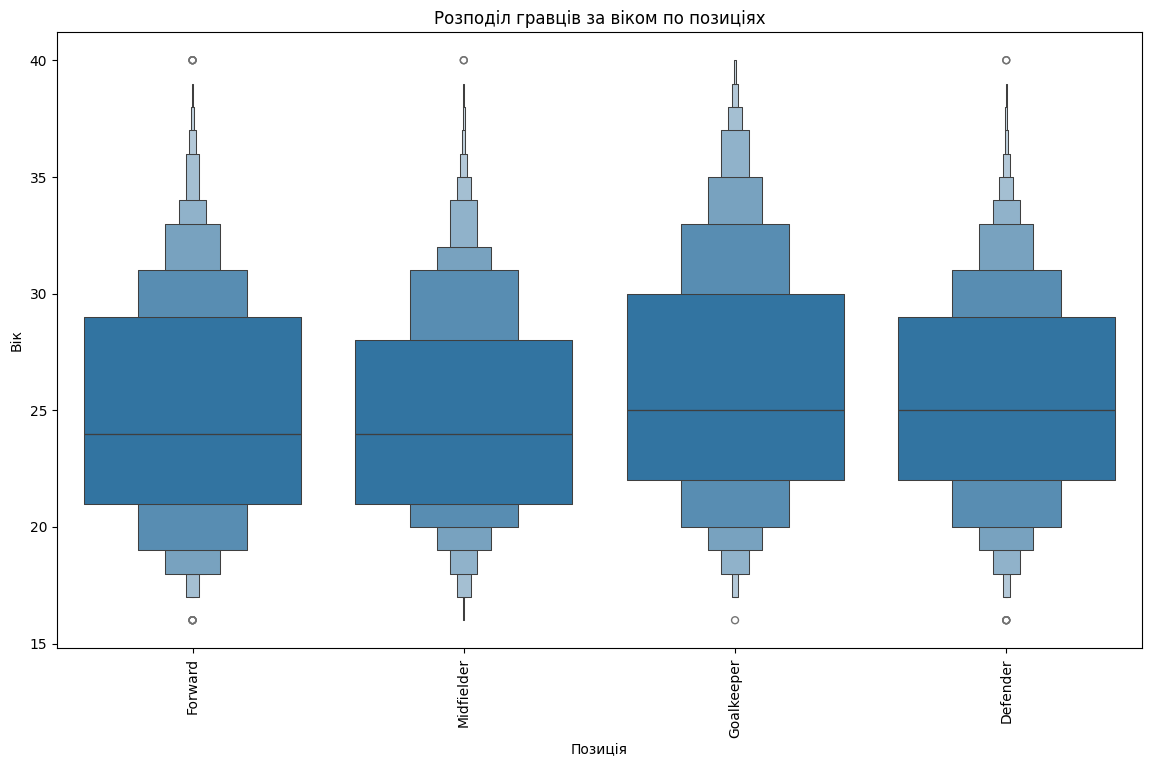

In [40]:
# 1. Діаграма розподілу гравців за віком по позиціях
plt.figure(figsize=(14, 8))
sns.boxenplot(x='position_group', y='age', data=data_cleaned)
plt.xticks(rotation=90)
plt.title("Розподіл гравців за віком по позиціях")
plt.xlabel("Позиція")
plt.ylabel("Вік")
plt.show()

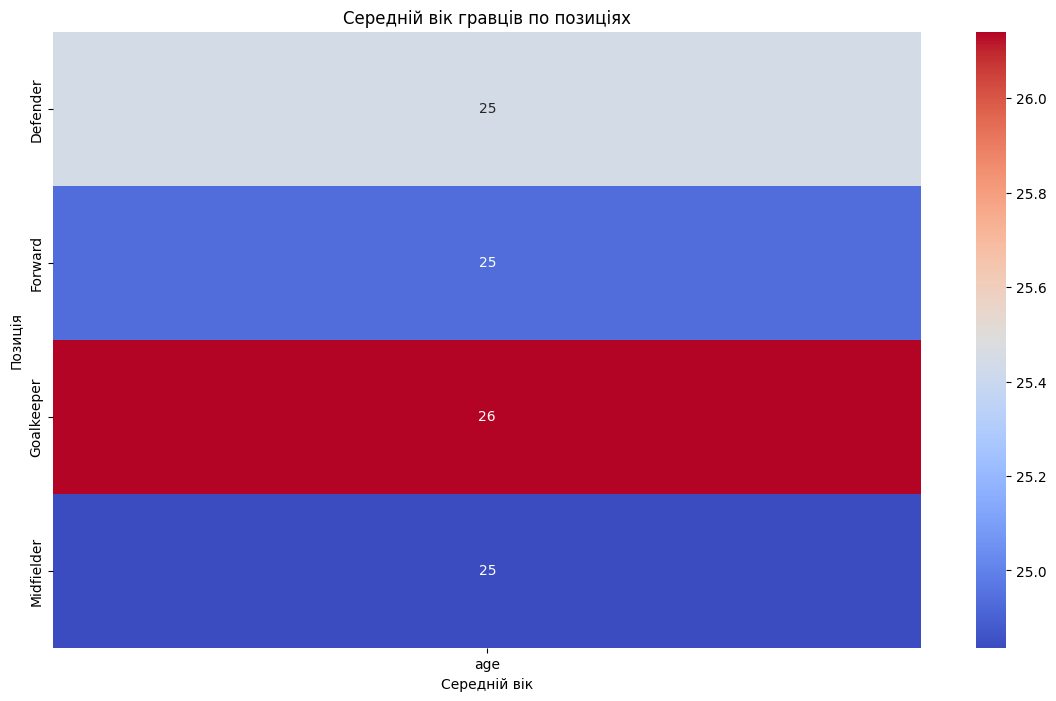

In [41]:
# Створення зведеної таблиці
pivot = data_cleaned.pivot_table(index='position_group', values='age', aggfunc=np.mean)

# Відображення теплової карти
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Середній вік гравців по позиціях")
plt.xlabel("Середній вік")
plt.ylabel("Позиція")
plt.show()

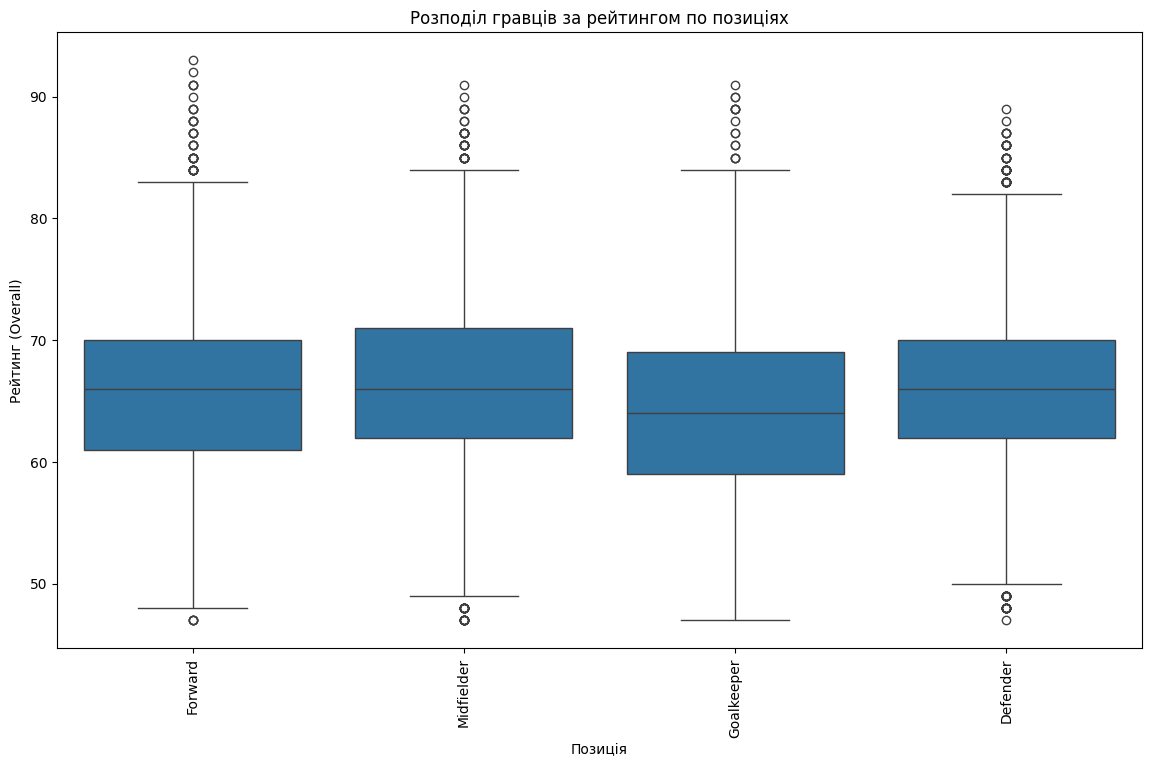

In [42]:
# 2. Діаграма розподілу гравців за рейтингом по позиціях
plt.figure(figsize=(14, 8))
sns.boxplot(x='position_group', y='overall', data=data_cleaned)
plt.xticks(rotation=90)
plt.title("Розподіл гравців за рейтингом по позиціях")
plt.xlabel("Позиція")
plt.ylabel("Рейтинг (Overall)")
plt.show()

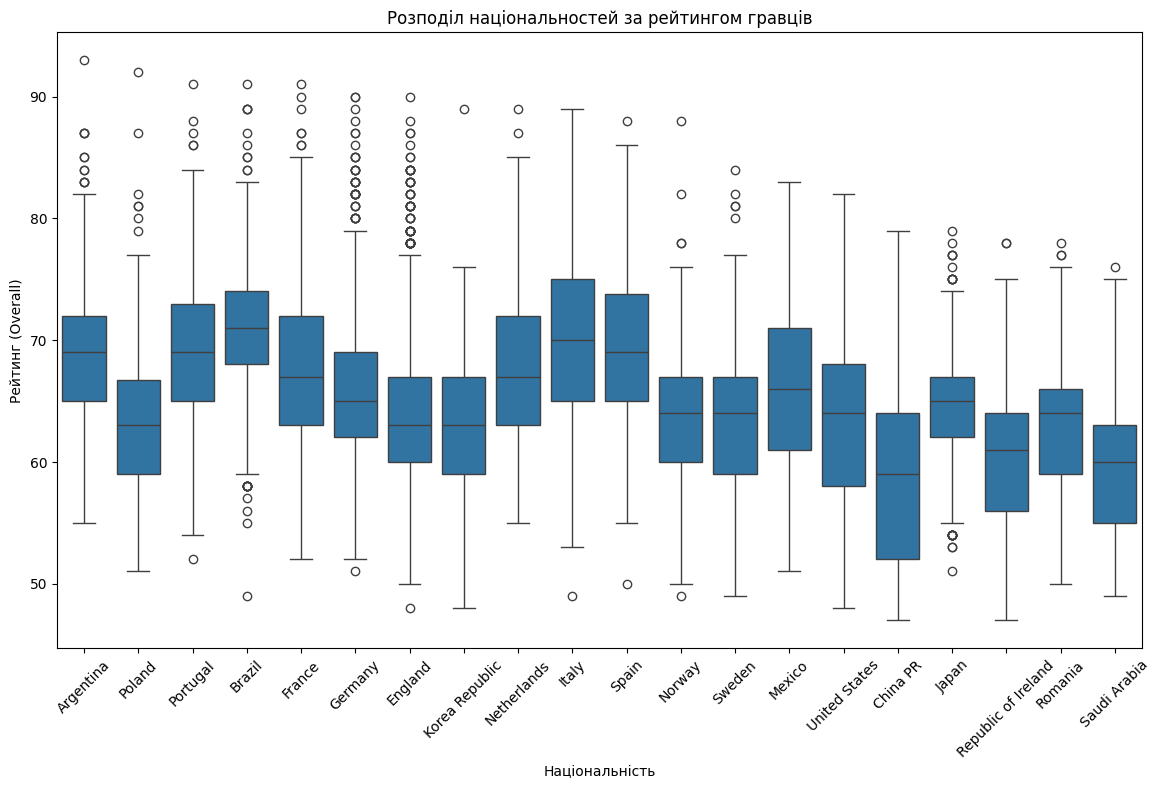

In [43]:
# 3. Діаграма розподілу національностей за рейтингом гравців
top_nationalities = data_cleaned['nationality_name'].value_counts().head(20).index  # Топ-20 національностей
plt.figure(figsize=(14, 8))
sns.boxplot(x='nationality_name', y='overall', data=data_cleaned[data_cleaned['nationality_name'].isin(top_nationalities)])
plt.xticks(rotation=45)
plt.title("Розподіл національностей за рейтингом гравців")
plt.xlabel("Національність")
plt.ylabel("Рейтинг (Overall)")
plt.show()

## III: Блок аналітичного мислення

Для продовження аналізу перейдемо до розробки метрик для оцінки якості гравців у специфічних ролях — пенальтистів та воротарів, які відбивають пенальті. Далі проведемо аналіз клубів з найкращими пенальтистами і воротарями для виявлення сильних і слабких сторін команд.

#### Кроки аналізу:
- Розробка метрики для оцінки пенальтистів: врахування характеристик: сила удару, точність удару, ментальні показники.
- Розробка метрики для оцінки воротарів, які відбивають пенальті: врахування характеристик: реакція, позиціювання, стрибучість.
- Порівняння пенальтистів і воротарів у клубах: визначення клубів, де є суттєва різниця між пенальтистами та воротарями.
- Аналіз найкращих клубів з точки зору пенальтистів та воротарів.

In [44]:
# Додавання метрик для пенальтистів та воротарів
data['penalty_taker_score'] = (
    0.4 * data_cleaned['mentality_penalties'] +  # Точність виконання пенальті
    0.2 * data_cleaned['mentality_composure'] +  # Холоднокровність
    0.2 * data_cleaned['power_shot_power'] +     # Сила удару
    0.2 * data_cleaned['shooting']               # Загальна якість ударів
)

data['penalty_goalkeeper_score'] = (
    0.3 * data_cleaned['goalkeeping_reflexes'] +   # Рефлекси
    0.3 * data_cleaned['goalkeeping_diving'] +     # Стрибучість
    0.2 * data_cleaned['goalkeeping_positioning'] + # Позиціювання
    0.2 * data_cleaned['goalkeeping_handling']     # Обробка м'яча
)

# Вибір гравців із відповідними ролями (пенальтисти та воротарі)
#penalty_takers = data_cleaned[data_cleaned['mentality_penalties'] > 70]
#penalty_goalkeepers = data_cleaned[data_cleaned['player_positions'].str.contains('GK') & (data_cleaned['goalkeeping_reflexes'] > 60)]

# Топ 10 клубів з найкращими пенальтистами
#top_10_penalty_taker_clubs = penalty_takers.groupby('club_name').agg({'penalty_taker_score': 'mean'}).sort_values(by='penalty_taker_score', ascending=False).head(10).reset_index()

top_penalty_takers = data[['club_name', 'penalty_taker_score']].sort_values(by='penalty_taker_score', ascending=False)
top_10_penalty_taker_clubs = top_penalty_takers.groupby('club_name').head(1).sort_values(by='penalty_taker_score', ascending=False).head(10)

# Топ 10 клубів з найкращими воротарями
#top_10_goalkeeper_clubs = penalty_goalkeepers.groupby('club_name').agg({'penalty_goalkeeper_score': 'mean'}).sort_values(by='penalty_goalkeeper_score', ascending=False).head(10).reset_index()

top_goalkeepers = data[['club_name', 'penalty_goalkeeper_score']].sort_values(by='penalty_goalkeeper_score', ascending=False)
top_10_goalkeeper_clubs = top_goalkeepers.groupby('club_name').head(1).sort_values(by='penalty_goalkeeper_score', ascending=False).head(10)

# Порівняння середніх показників між пенальтистами та воротарями для кожного клубу
club_comparison = (
    top_10_penalty_taker_clubs.set_index('club_name')
    .join(top_10_goalkeeper_clubs.set_index('club_name'), how='outer', lsuffix='_taker', rsuffix='_keeper')
)

# Показати результати для пенальтистів, воротарів та порівняння
print(top_10_penalty_taker_clubs, "\n")
print(top_10_goalkeeper_clubs, "\n")
print(club_comparison, "\n")

                   club_name  penalty_taker_score
2          Manchester United                 91.8
9          Tottenham Hotspur                 91.0
1          FC Bayern München                 90.0
3        Paris Saint-Germain                 88.4
25                   Chelsea                 87.6
179           TSG Hoffenheim                 87.0
4            Manchester City                 86.4
23        Atlético de Madrid                 86.4
97                  AC Milan                 86.2
168  Wolverhampton Wanderers                 86.2 

              club_name  penalty_goalkeeper_score
5    Atlético de Madrid                      89.5
7     FC Bayern München                      88.2
8          FC Barcelona                      88.0
21  Paris Saint-Germain                      87.9
20            Liverpool                      87.7
31    Tottenham Hotspur                      86.8
12       Real Madrid CF                      86.6
18      Manchester City                      86.

#### Результати:
1. Топ 10 клубів з найкращими пенальтистами:
- Manchester United має найвищий рейтинг пенальтистів — 91.8.
- Інші клуби, такі як Manchester United, AC Milan, та FC Bayern München, також мають високі показники.
2. Топ 10 клубів з найкращими воротарями:
- Atlético de Madrid лідирує з рейтингом 89.5 серед воротарів, які відбивають пенальті.
3. Порівняння показників між пенальтистами та воротарями:
- Відображає суттєві відмінності між клубами. Наприклад, в Tottenham Hotspur показник для пенальтистів становить 91.0, тоді як воротарі мають 86.8.
- Деякі клуби, такі як Manchester United та Chelsea, мають високі показники пенальтистів, але не входять до топ-10 для воротарів.

### Визначимо клуби, в яких пенальтисти значно сильніші за воротарів, і навпаки. Після цього підготуємо звіт щодо сильних та слабких сторін цих команд для подальшого бізнес-аналізу.

In [45]:
# Залишаємо лише ті клуби, де є дані і про пенальтистів, і про воротарів
club_comparison = (
    top_10_penalty_taker_clubs.set_index('club_name')
    .join(top_10_goalkeeper_clubs.set_index('club_name'), how='inner', lsuffix='_taker', rsuffix='_keeper')
)

# Перейменовуємо колонки для зручності
club_comparison.rename(columns={
    'penalty_taker_score': 'penalty_taker_score_avg',
    'penalty_goalkeeper_score': 'penalty_goalkeeper_score_avg'
}, inplace=True)

# Скидаємо індекс для подальшого аналізу
club_comparison.reset_index(inplace=True)

# Обчислюємо різницю між середніми метриками
club_comparison['Difference'] = club_comparison['penalty_taker_score_avg'] - club_comparison['penalty_goalkeeper_score_avg']

# Визначаємо середнє та стандартне відхилення різниць
mean_difference = club_comparison['Difference'].mean()
std_difference = club_comparison['Difference'].std()

# Встановлюємо поріг для суттєвої різниці (наприклад, 1 стандартне відхилення)
threshold = std_difference

# Визначаємо клуби, де пенальтисти значно сильніші за воротарів
strong_penalty_takers = club_comparison[club_comparison['Difference'] > threshold]

# Визначаємо клуби, де воротарі значно сильніші за пенальтистів
strong_goalkeepers = club_comparison[club_comparison['Difference'] < -threshold]

In [46]:
print("Клуби, де пенальтисти значно сильніші за воротарів:")
display(strong_penalty_takers[['club_name', 'penalty_taker_score_avg', 'penalty_goalkeeper_score_avg', 'Difference']])

Клуби, де пенальтисти значно сильніші за воротарів:


,club_name,penalty_taker_score_avg,penalty_goalkeeper_score_avg,Difference
0,Tottenham Hotspur,91.0,86.8,4.2


##### Клуб Tottenham Hotspur має висококваліфікованих пенальтистів з високим середнім балом та мають високу ймовірність успішного виконання пенальті. Проте воротарі можуть бути недостатньо ефективними у відбитті пенальті, ризик пропуску голів з пенальті від суперників
##### В інших ТОП10 клубах не має суттєвого дисбалансу у силах гравців.

In [47]:
print("\nКлуби, де воротарі значно сильніші за пенальтистів:")
display(strong_goalkeepers[['club_name', 'penalty_taker_score_avg', 'penalty_goalkeeper_score_avg', 'Difference']])


Клуби, де воротарі значно сильніші за пенальтистів:


,club_name,penalty_taker_score_avg,penalty_goalkeeper_score_avg,Difference
4,Atlético de Madrid,86.4,89.5,-3.1


##### Клуб Atlético de Madrid має сильних воротарів з високим середнім балом у відбитті пенальті. Проте пенальтисти можуть бути менш ефективними, що призводить до втрати можливостей забити гол.
##### В інших ТОП10 клубах не має суттєвого дисбалансу у силах гравців.

### Аналіз всіх клубів

In [48]:
# Визначення порогу для відбору топ пенальтистів
# Можна використовувати, наприклад, верхні 25% значень метрики
threshold_penalty_taker_score = data['penalty_taker_score'].quantile(0.75)

# Вибір гравців з метрикою вище порогу
penalty_takers = data[data['penalty_taker_score'] > threshold_penalty_taker_score]

# Обчислення середнього балу пенальтистів для кожного клубу
penalty_taker_scores = penalty_takers.groupby('club_name').agg({'penalty_taker_score': 'mean'}).reset_index()

# Визначення порогу для відбору топ воротарів
threshold_penalty_goalkeeper_score = data['penalty_goalkeeper_score'].quantile(0.75)

# Вибір воротарів з метрикою вище порогу
penalty_goalkeepers = data[
    data['player_positions'].str.contains('GK', na=False) &
    (data['penalty_goalkeeper_score'] > threshold_penalty_goalkeeper_score)
]

# Обчислення середнього балу воротарів для кожного клубу
penalty_goalkeeper_scores = penalty_goalkeepers.groupby('club_name').agg({'penalty_goalkeeper_score': 'mean'}).reset_index()

# Об'єднуємо дані по клубах
club_comparison = pd.merge(penalty_taker_scores, penalty_goalkeeper_scores, on='club_name', how='inner')

# Обчислюємо різницю між середніми балами
club_comparison['Difference'] = club_comparison['penalty_taker_score'] - club_comparison['penalty_goalkeeper_score']

# Визначаємо середнє та стандартне відхилення різниць
mean_difference = club_comparison['Difference'].mean()
std_difference = club_comparison['Difference'].std()

# Встановлюємо поріг для суттєвої різниці (наприклад, 1 стандартне відхилення)
threshold = std_difference

# Визначаємо клуби, де пенальтисти значно сильніші за воротарів
strong_penalty_takers = club_comparison[club_comparison['Difference'] > threshold]

# Визначаємо клуби, де воротарі значно сильніші за пенальтистів
strong_goalkeepers = club_comparison[club_comparison['Difference'] < -threshold]

In [49]:
print("Клуби, де пенальтисти значно сильніші за воротарів:")
display(strong_penalty_takers[['club_name', 'penalty_taker_score', 'penalty_goalkeeper_score', 'Difference']].sort_values(by='Difference', ascending=False))
display(
    strong_penalty_takers[
        strong_penalty_takers['club_name'] == 'Tottenham Hotspur'
    ][['club_name', 'penalty_taker_score', 'penalty_goalkeeper_score', 'Difference']]
    .sort_values(by='Difference', ascending=True)
)

Клуби, де пенальтисти значно сильніші за воротарів:


,club_name,penalty_taker_score,penalty_goalkeeper_score,Difference
477,Qingdao FC,76.600000,53.600000,23.000000
405,Melbourne City FC,71.100000,54.200000,16.900000
419,Mumbai City FC,67.200000,50.900000,16.300000
25,ATK Mohun Bagan FC,68.200000,52.333333,15.866667
612,Tianjin Jinmen Tiger FC,70.000000,54.700000,15.300000
...,...,...,...,...
67,Atlético Tucumán,65.500000,61.150000,4.350000
64,Atlanta United,68.666667,64.333333,4.333333
122,Carlos A. Mannucci,65.100000,60.775000,4.325000
455,Pachuca,66.418182,62.100000,4.318182


,club_name,penalty_taker_score,penalty_goalkeeper_score,Difference


In [50]:
print("\nКлуби, де воротарі значно сильніші за пенальтистів:")
display(strong_goalkeepers[['club_name', 'penalty_taker_score', 'penalty_goalkeeper_score', 'Difference']].sort_values(by='Difference', ascending=True))
display(
    strong_goalkeepers[
        strong_goalkeepers['club_name'] == 'Atlético de Madrid'
    ][['club_name', 'penalty_taker_score', 'penalty_goalkeeper_score', 'Difference']]
    .sort_values(by='Difference', ascending=True)
)


Клуби, де воротарі значно сильніші за пенальтистів:


,club_name,penalty_taker_score,penalty_goalkeeper_score,Difference
617,Tottenham Hotspur,74.709091,84.400000,-9.690909
423,Napoli,70.329412,79.300000,-8.970588
91,Borussia Dortmund,71.082353,79.600000,-8.517647
501,Real Sociedad,71.092308,79.200000,-8.107692
359,Juventus,72.411111,80.066667,-7.655556
497,Real Betis Balompié,70.900000,78.466667,-7.566667
140,Club Athletico Paranaense,67.275000,74.200000,-6.925000
551,Santos,67.755556,74.450000,-6.694444
629,Udinese Calcio,69.861538,76.400000,-6.538462
258,FC Porto,69.933333,76.200000,-6.266667


,club_name,penalty_taker_score,penalty_goalkeeper_score,Difference


##### Як бачимо, ТОП10 клубів не попадають в вибірку, через те що якість гравців не суттєво відрізняється ніж в інших, більш слабких клубах.

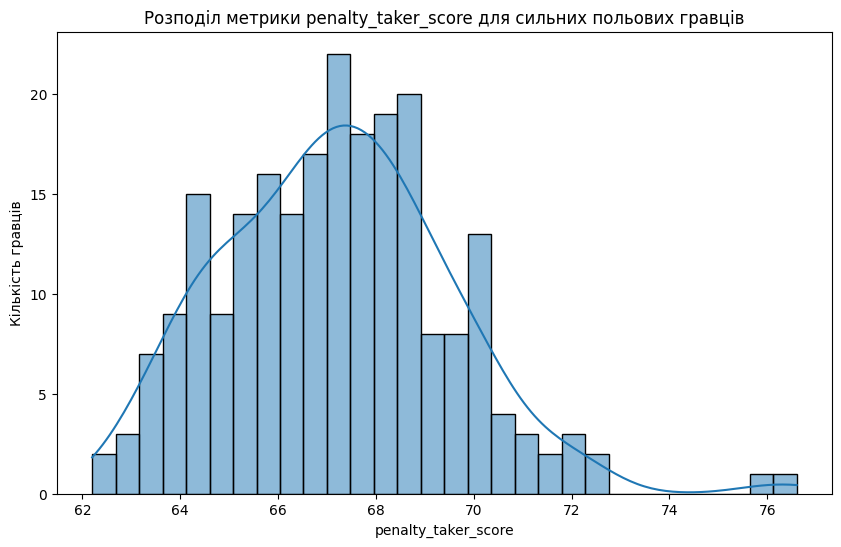

In [51]:
# Візуалізація розподілу penalty_taker_score для польових гравців
plt.figure(figsize=(10,6))
sns.histplot(strong_penalty_takers['penalty_taker_score'], bins=30, kde=True)
plt.title('Розподіл метрики penalty_taker_score для сильних польових гравців')
plt.xlabel('penalty_taker_score')
plt.ylabel('Кількість гравців')
plt.show()

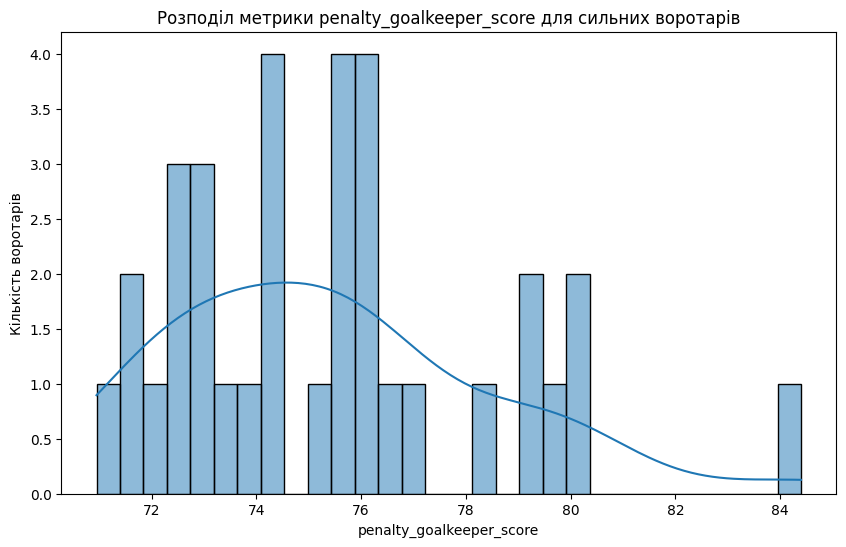

In [52]:
# Візуалізація розподілу penalty_goalkeeper_score для воротарів
plt.figure(figsize=(10,6))
sns.histplot(strong_goalkeepers['penalty_goalkeeper_score'], bins=30, kde=True)
plt.title('Розподіл метрики penalty_goalkeeper_score для сильних воротарів')
plt.xlabel('penalty_goalkeeper_score')
plt.ylabel('Кількість воротарів')
plt.show()

In [53]:
# Вибираємо топ 20 клубів за абсолютним значенням різниці
top_n = 20
club_comparison['abs_difference'] = club_comparison['Difference'].abs()
top_clubs = club_comparison.sort_values(by='abs_difference', ascending=False).head(top_n)

# Побудова графіка з топ N клубів
fig = px.bar(
    top_clubs,
    x='Difference',
    y='club_name',
    orientation='h',
    hover_name='club_name',
    hover_data={
        'penalty_taker_score': True,
        'penalty_goalkeeper_score': True,
        'Difference': True,
        'club_name': False,
    },
    labels={
        'Difference': 'Різниця між пенальтистами та воротарями',
        'club_name': 'Клуб',
    },
    title=f'Топ {top_n} клубів за абсолютною різницею між метриками',
    height=600,
)

# Налаштування графіка
fig.update_layout(
    yaxis=dict(
        tickmode='linear',
        tickfont=dict(size=10)
    ),
    xaxis=dict(title='Різниця'),
    title_x=0.5,
)

# Додаємо вертикальні лінії для порогів
fig.add_vline(x=threshold, line_dash='dash', line_color='green', annotation_text='Позитивний поріг', annotation_position='top left')
fig.add_vline(x=-threshold, line_dash='dash', line_color='red', annotation_text='Негативний поріг', annotation_position='bottom left')

# Відображаємо графік
fig.show()

## IV: Блок бізнес аналітики та інсайтів

### Опис датафрейму:

### Датасет містить детальну інформацію про професійних футболістів з різних ліг та клубів.
### Основні категорії даних включають:
1. Особисті дані гравців:
- Ідентифікаційні дані: ім'я, прізвище, унікальні ідентифікатори.
- Біометричні показники: вік, зріст, вага, національність.
2. Професійні дані:
- Позиція на полі: основна позиція та альтернативні позиції.
- Клубні дані: назва клубу, в якому грає гравець, позиція в клубі, номер футболки.
- Лігові дані: назва ліги, рівень ліги.
3. Навички та атрибути:
- Технічні навички: дриблінг, пас, удар, контроль м'яча тощо.
- Фізичні показники: швидкість, витривалість, сила.
- Ментальні навички: рішучість, лідерство, концентрація.
- Спеціальні навички воротарів: рефлекси, позиціювання, обробка м'яча.
4. Фінансові дані:
- Ринкова вартість: оцінка вартості гравця на трансферному ринку.
- Зарплата: поточна заробітна плата в євро.
5. Додаткові дані:
- Контрактні деталі: дата закінчення контракту, статус оренди.
- Теги гравця: особливі якості або ролі.

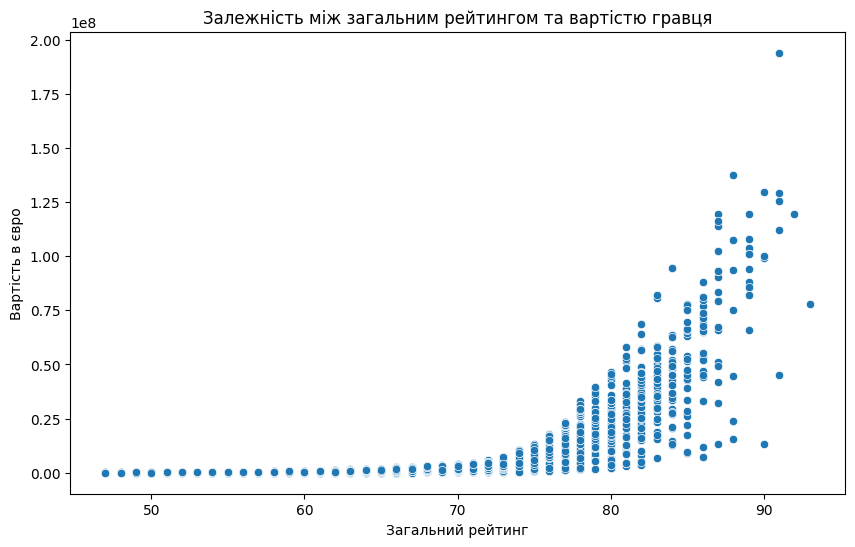

In [54]:
# Кореляція між загальним рейтингом та вартістю гравця
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['overall'], y=data['value_eur'])
plt.title('Залежність між загальним рейтингом та вартістю гравця')
plt.xlabel('Загальний рейтинг')
plt.ylabel('Вартість в євро')
plt.show()

In [55]:
# Середня вартість гравців за лігами
league_values = data.groupby('league_name')['value_eur'].mean().sort_values(ascending=False)
print("Середня вартість гравців за лігами:")
print(league_values)

Середня вартість гравців за лігами:
league_name
English Premier League                  1.403218e+07
Spain Primera Division                  1.150427e+07
Italian Serie A                         9.429298e+06
German 1. Bundesliga                    8.644973e+06
French Ligue 1                          7.347478e+06
Ukrainian Premier League                5.689286e+06
Russian Premier League                  4.675061e+06
Czech Republic Gambrinus Liga           4.284367e+06
Portuguese Liga ZON SAGRES              3.990861e+06
Campeonato Brasileiro Série A           3.872583e+06
Greek Super League                      3.440357e+06
Croatian Prva HNL                       3.062411e+06
Holland Eredivisie                      2.957165e+06
Mexican Liga MX                         2.286496e+06
Turkish Süper Lig                       2.232716e+06
Belgian Jupiler Pro League              2.134191e+06
Hungarian Nemzeti Bajnokság I           1.989464e+06
Argentina Primera División              1.972840e+0

In [56]:
# Топ 10 найдорожчих гравців
top_valuable_players = data.sort_values(by='value_eur', ascending=False).head(10)
print("Топ 10 найдорожчих гравців:")
print(top_valuable_players[['short_name', 'age', 'club_name', 'value_eur', 'wage_eur']])

Топ 10 найдорожчих гравців:
                   short_name  age            club_name    value_eur  wage_eur
6            Kyl. Mba. Lottin   22  Paris Saint-Germain  194000000.0  230000.0
29          Erl. Bra. Haaland   20    Borussia Dortmund  137500000.0  110000.0
9                   Har. Kane   27    Tottenham Hotspur  129500000.0  240000.0
3   Ney. Da. Sil. San. Júnior   29  Paris Saint-Germain  129000000.0  270000.0
4             Kev. De. Bruyne   30      Manchester City  125500000.0  350000.0
43              Fre. De. Jong   24         FC Barcelona  119500000.0  210000.0
1            Rob. Lewandowski   32    FC Bayern München  119500000.0  270000.0
21            Gia. Donnarumma   22  Paris Saint-Germain  119500000.0  110000.0
45                Jad. Sancho   21    Manchester United  116500000.0  150000.0
44      Tre. Alexander-Arnold   22            Liverpool  114000000.0  150000.0


### Корисність даних з точки зору бізнесу:

### Для футбольних клубів та спортивних директорів:
1. Скаутинг та підбір гравців:
- Ідентифікація талантів: пошук перспективних молодих гравців з високим потенціалом.
- Аналіз відповідності: оцінка, наскільки гравець підходить до стилю гри команди та її потреб.
2. Трансферна політика:
- Оцінка вартості гравців: прийняття рішень щодо купівлі або продажу гравців на основі ринкової вартості та потенціалу.
- Оптимізація бюджету: аналіз співвідношення ціни та якості для ефективного розподілу фінансових ресурсів.

### Для тренерів та аналітиків:
1. Стратегічне планування:
- Аналіз складу команди: виявлення сильних та слабких сторін на різних позиціях.
- Підготовка до матчів: аналіз суперників, їхніх ключових гравців та тактичних схем.
2. Розвиток гравців:
- Індивідуальні тренування: визначення областей для покращення навичок конкретних гравців.
- Моніторинг прогресу: відстеження змін у навичках та продуктивності гравців з часом.

### Для маркетологів та спонсорів:
1. Побудова бренду:
- Вибір амбасадорів: ідентифікація популярних та впливових гравців для рекламних кампаній.
- Цільовий маркетинг: розуміння аудиторії через аналіз національностей та популярності гравців.
2. Залучення спонсорів:
- Дані про відомих гравців: використання статистики для демонстрації цінності співпраці.

### Для букмекерських контор та аналітичних компаній:
1. Прогнозування результатів:
- Моделювання матчів: використання детальних статистичних даних для побудови моделей прогнозування.
- Оцінка ймовірностей: більш точне встановлення коефіцієнтів на основі навичок та форми гравців.

### Для розробників ігор та додатків:
1. Реалістичність симуляцій:
- Створення профілів гравців: використання реальних даних для підвищення автентичності ігор.
- Персоналізація контенту: адаптація ігрового досвіду під вподобання користувачів.

### Що можна дослідити:

1. Аналіз продуктивності гравців:
- Визначення ключових факторів успіху: які навички найбільше впливають на загальний рейтинг.
- Порівняння гравців: бенчмаркінг гравців на тій самій позиції.
2. Тенденції та патерни:
- Демографічні дослідження: як вік або національність впливають на певні навички.
- Ринкові тренди: зміни у вартості гравців залежно від їхніх показників.
3. Сегментація та кластеризація:
- Групування гравців: створення сегментів за схожими характеристиками для цільових стратегій.
- Індивідуалізація тренувань: адаптація програм під конкретні потреби груп гравців.
4. Прогнозування та моделювання:
- Прогноз розвитку гравців: використання історичних даних для передбачення майбутніх показників.
- Оцінка ризиків: ймовірність зниження продуктивності або травм.
5. Економічний аналіз:
- ROI гравців: співвідношення між вкладеними коштами та результативністю.
- Вплив зарплат на мотивацію та продуктивність.

### Потенційні клієнти:

1. Футбольні клуби та академії:
- Професіональні клуби: для оптимізації складу та трансферної політики.
- Молодіжні академії: для розвитку молодих талантів.
2. Скаутські та спортивні агенції:
- Пошук та представлення гравців: надання аналітики для клієнтів.
3. Маркетингові та рекламні компанії:
- Розробка кампаній: вибір гравців для промоції продуктів або послуг.
4. Букмекерські контори:
- Аналітика для встановлення коефіцієнтів: підвищення точності прогнозів.
5. Спортивні медіа та аналітичні платформи:
- Контент створення: генерація статистичних матеріалів, статей, рейтингів.
6. Розробники ігор та додатків:
-Інтеграція даних: використання реальних даних для підвищення інтересу користувачів.

### Пропозиції для потенційних клієнтів:

1. Аналітичні звіти та інсайти:
- Персоналізовані звіти: детальний аналіз конкретних гравців або команд.
- Галузеві дослідження: огляд тенденцій у футбольному світі.
2. Доступ до бази даних:
-API інтеграція: можливість підключення до даних у реальному часі.
-Ліцензування даних: використання даних для внутрішніх потреб компанії.
3. Консультаційні послуги:
- Стратегічний консалтинг: допомога у прийнятті рішень щодо трансферів або маркетингових кампаній.
- Тренінги та воркшопи: навчання персоналу ефективному використанню даних.
4. Розробка інструментів та платформ:
- Дашборди та візуалізації: створення інструментів для зручного аналізу даних.
- Моделі прогнозування: побудова моделей для специфічних потреб клієнта.

### Підсумок:

### Дані в датафреймі є багатим джерелом інформації для різних стейкхолдерів у футбольній індустрії. Вони дозволяють приймати обґрунтовані рішення, оптимізувати бізнес-процеси та знаходити нові можливості для зростання та розвитку. Завдяки поєднанню детальної статистики та аналітичних моделей, можна надавати цінні інсайти, що сприятимуть успіху клієнтів у їхніх сферах діяльності.

## V: Блок “чистого Data Science”

In [57]:
# Розбиття значень у колонці 'player_positions' по рядках, збереження інших колонок
expanded_data = data.assign(player_positions=data['player_positions'].str.split(', ')).explode('player_positions')

In [58]:
display(expanded_data[['player_positions','short_name','position_group']])

,player_positions,short_name,position_group
0,RW,Lio. And. Mes. Cuccittini,Forward
0,ST,Lio. And. Mes. Cuccittini,Forward
0,CF,Lio. And. Mes. Cuccittini,Forward
1,ST,Rob. Lewandowski,Forward
2,ST,Cri. Ron. Dos. San. Aveiro,Forward
...,...,...,...
19234,CDM,宋德福,Midfielder
19235,CM,Cao. Porter,Midfielder
19236,CM,Nat. Logue-Cunningham,Midfielder
19237,ST,Luk. Rudden,Forward


In [59]:
print(expanded_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 31945 entries, 0 to 19238
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   short_name                   31945 non-null  object 
 1   player_positions             31945 non-null  object 
 2   overall                      31945 non-null  int64  
 3   potential                    31945 non-null  int64  
 4   value_eur                    31848 non-null  float64
 5   wage_eur                     31848 non-null  float64
 6   age                          31945 non-null  int64  
 7   height_cm                    31945 non-null  int64  
 8   weight_kg                    31945 non-null  int64  
 9   club_position                31848 non-null  object 
 10  club_name                    31848 non-null  object 
 11  league_name                  31848 non-null  object 
 12  league_level                 31848 non-null  float64
 13  club_joined          

In [60]:
# Обробка пропущених значень у 'club_position_group' та 'nation_position_group'
expanded_data['club_position_group'] = expanded_data['club_position_group'].fillna('Unknown')
expanded_data['nation_position_group'] = expanded_data['nation_position_group'].fillna('Unknown')

In [61]:
# Виключення колонок 'club_position' та 'nation_position'
expanded_data.drop(columns=['club_position', 'nation_position'], inplace=True)

In [62]:
## Кодування цільової змінної 'player_positions'
le_player_positions = LabelEncoder()
expanded_data['player_positions_encoded'] = le_player_positions.fit_transform(expanded_data['player_positions'])

In [63]:
# Кодування змінної 'position_group'
le_position_group = LabelEncoder()
expanded_data['position_group_encoded'] = le_position_group.fit_transform(expanded_data['position_group'])

In [64]:
# One-Hot кодування категоріальних змінних
categorical_features = ['preferred_foot', 'work_rate', 'body_type']
expanded_data = pd.get_dummies(expanded_data, columns=categorical_features)

In [65]:
# Додавання характеристики BMI
expanded_data['height_m'] = expanded_data['height_cm'] / 100
expanded_data['BMI'] = expanded_data['weight_kg'] / (expanded_data['height_m'] ** 2)

In [66]:
# Додавання членство років у клубі
expanded_data['years_in_club'] = (
    pd.to_datetime('2024-10-01') - pd.to_datetime(expanded_data['club_joined'], errors='coerce')
).dt.days / 365.25
expanded_data['years_in_club'] = expanded_data['years_in_club'].fillna(0)

In [67]:
# Логарифмічне перетворення фінансових даних
expanded_data['log_value_eur'] = np.log1p(expanded_data['value_eur'])
expanded_data['log_wage_eur'] = np.log1p(expanded_data['wage_eur'])
expanded_data['log_release_clause_eur'] = np.log1p(expanded_data['release_clause_eur'])

In [68]:
## Видалення непотрібних колонок
columns_to_drop = [
    'short_name', 'club_name', 'league_name', 'nationality_name',
    'club_joined', 'player_positions_list', 'main_position', 'position_group',
    'height_m',  'club_position_group', 'nation_position_group',
    'value_eur', 'wage_eur', 'release_clause_eur'  # Вже є логарифмічні версії
]
expanded_data.drop(columns=columns_to_drop, inplace=True)

In [69]:
# Заповнення пропущених значень у числових стовпцях
numerical_cols = expanded_data.select_dtypes(include=['float64', 'int64']).columns
expanded_data[numerical_cols] = expanded_data[numerical_cols].fillna(expanded_data[numerical_cols].median())

# Заповнення пропущених значень у категоріальних стовпцях
categorical_cols = expanded_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode = expanded_data[col].mode()
    if not mode.empty:
        expanded_data[col] = expanded_data[col].fillna(mode.iloc[0])
    else:
        expanded_data[col] = expanded_data[col].fillna('Unknown')

### Feature Selection

In [70]:
# Цільова змінна та ознаки
y_group = expanded_data['position_group_encoded']
X_group = expanded_data.drop(columns=['position_group_encoded', 'player_positions_encoded', 'player_positions'])

# Кодування категоріальних змінних у X_group
non_numeric_columns = X_group.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric_columns:
    X_group = pd.get_dummies(X_group, columns=non_numeric_columns)

In [71]:
# Балансування даних
smote = SMOTE(random_state=42)
X_group_resampled, y_group_resampled = smote.fit_resample(X_group, y_group)

In [72]:
# Розділення на тренувальний та тестовий набори
X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(
    X_group_resampled, y_group_resampled, test_size=0.2, random_state=42)

In [73]:
# Нормалізація даних
scaler_group = StandardScaler()
X_group_train_scaled = scaler_group.fit_transform(X_group_train)
X_group_test_scaled = scaler_group.transform(X_group_test)

### Моделювання з використанням ансамблю моделей

In [74]:
# Параметричні сітки для RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'max_depth': [None] + [int(x) for x in range(5, 25, 5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_dist_gb = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [1.0, 0.8],
    'min_samples_split': [2, 5, 10]
}

param_dist_xgb = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [1.0, 0.8],
    'colsample_bytree': [1.0, 0.8]
}

param_dist_lgbm = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'boosting_type': ['gbdt'],
    'objective': ['multiclass'],
    'subsample': [1.0, 0.8],
    'colsample_bytree': [1.0, 0.8]
}

In [75]:
# Визначаємо метрику для оптимізації
scorer = make_scorer(f1_score, average='weighted')

# Функція для навчання моделі з використанням RandomizedSearchCV
def train_model_randomized(model, param_dist, X_train, y_train):
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=50, cv=3, n_jobs=-1, scoring=scorer, verbose=1, random_state=42)
    randomized_search.fit(X_train, y_train)
    return randomized_search

# Список моделей для ансамблю
models_group = [
    ('RandomForest', RandomForestClassifier(random_state=42), param_dist_rf),
    #('GradientBoosting', GradientBoostingClassifier(random_state=42), param_dist_gb),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_dist_xgb),
    ('LightGBM', LGBMClassifier(random_state=42), param_dist_lgbm)
]

# Навчання та оцінка моделей
best_model_group = None
best_score_group = 0

for name, model, param_dist in models_group:
    print(f"\nTraining model for position_group_encoded: {name}")
    trained_model = train_model_randomized(model, param_dist, X_group_train_scaled, y_group_train)
    y_pred = trained_model.predict(X_group_test_scaled)
    f1 = f1_score(y_group_test, y_pred, average='weighted')
    precision = precision_score(y_group_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_group_test, y_pred, average='weighted', zero_division=0)
    print(f"F1 Score on Test Set: {f1:.4f}")
    print(f"Precision on Test Set: {precision:.4f}")
    print(f"Recall on Test Set: {recall:.4f}")
    print("Classification Report:")
    print(classification_report(y_group_test, y_pred, zero_division=0))
    if f1 > best_score_group:
        best_score_group = f1
        best_model_group = trained_model

# Використовуємо найкращу модель для прогнозування 'position_group_encoded'
best_group_model = best_model_group


Training model for position_group_encoded: RandomForest
Fitting 3 folds for each of 50 candidates, totalling 150 fits
F1 Score on Test Set: 0.9871
Precision on Test Set: 0.9871
Recall on Test Set: 0.9871
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2870
           1       0.98      0.99      0.99      2890
           2       1.00      1.00      1.00      2777
           3       0.98      0.97      0.97      2778

    accuracy                           0.99     11315
   macro avg       0.99      0.99      0.99     11315
weighted avg       0.99      0.99      0.99     11315


Training model for position_group_encoded: XGBoost
Fitting 3 folds for each of 50 candidates, totalling 150 fits
F1 Score on Test Set: 0.9883
Precision on Test Set: 0.9883
Recall on Test Set: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2870
     

In [76]:
# Прогнозуємо 'position_group_encoded' для всього набору даних
X_group_scaled_full = scaler_group.transform(X_group)
y_group_pred_full = best_group_model.predict(X_group_scaled_full)

# Додаємо прогнозовані значення як нову ознаку
expanded_data['predicted_position_group'] = y_group_pred_full

In [77]:
# Цільова змінна та ознаки
y_position = expanded_data['player_positions_encoded']
X_position = expanded_data.drop(columns=['player_positions_encoded', 'player_positions'])

# Кодування категоріальних змінних у X_position
non_numeric_columns = X_position.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric_columns:
    X_position = pd.get_dummies(X_position, columns=non_numeric_columns)

# Балансування даних
smote = SMOTE(random_state=42)
X_position_resampled, y_position_resampled = smote.fit_resample(X_position, y_position)

# Розділення на тренувальний та тестовий набори
X_position_train, X_position_test, y_position_train, y_position_test = train_test_split(
    X_position_resampled, y_position_resampled, test_size=0.2, random_state=42)

# Нормалізація даних
scaler_position = StandardScaler()
X_position_train_scaled = scaler_position.fit_transform(X_position_train)
X_position_test_scaled = scaler_position.transform(X_position_test)

In [78]:
X_position.columns

Index(['overall', 'potential', 'age', 'height_cm', 'weight_kg', 'league_level',
       'weak_foot', 'skill_moves', 'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling

In [79]:
# Список моделей для ансамблю
models_position = [
    #('RandomForest', RandomForestClassifier(random_state=42), param_dist_rf),
    #('GradientBoosting', GradientBoostingClassifier(random_state=42), param_dist_gb),
    #('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_dist_xgb),
    ('LightGBM', LGBMClassifier(random_state=42), param_dist_lgbm)
]

# Навчання та оцінка моделей
best_model_position = None
best_score_position = 0

for name, model, param_dist in models_position:
    print(f"\nTraining model for player_positions_encoded: {name}")
    trained_model = train_model_randomized(model, param_dist, X_position_train_scaled, y_position_train)
    y_pred = trained_model.predict(X_position_test_scaled)
    f1 = f1_score(y_position_test, y_pred, average='weighted')
    precision = precision_score(y_position_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_position_test, y_pred, average='weighted', zero_division=0)
    print(f"F1 Score on Test Set: {f1:.4f}")
    print(f"Precision on Test Set: {precision:.4f}")
    print(f"Recall on Test Set: {recall:.4f}")
    print("Classification Report:")
    print(classification_report(y_position_test, y_pred, zero_division=0))
    if f1 > best_score_position:
        best_score_position = f1
        best_model_position = trained_model

# Використовуємо найкращу модель для прогнозування 'player_positions_encoded'
best_position_model = best_model_position



Training model for player_positions_encoded: LightGBM
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6924
[LightGBM] [Info] Number of data points in the train set: 50448, number of used features: 80
[LightGBM] [Info] Start training from score -2.699523
[LightGBM] [Info] Start training from score -2.708110
[LightGBM] [Info] Start training from score -2.695992
[LightGBM] [Info] Start training from score -2.707218
[LightGBM] [Info] Start training from score -2.710789
[LightGBM] [Info] Start training from score -2.712580
[LightGBM] [Info] Start training from score -2.711684
[LightGBM] [Info] Start training from score -2.707812
[LightGBM] [Info] Start training from score -2.700999
[LightGBM] [Info] Start training from score -2.722184
[LightGBM] [Info] Start training from score -2.708705


In [81]:
# Отримуємо унікальні значення 'position_group_encoded'
unique_groups = expanded_data['position_group_encoded'].unique()

# Словник для зберігання моделей для кожної групи
group_models = {}

for group in unique_groups:
    print(f"\nBuilding models for position group: {group}")
    
    # Фільтруємо дані для поточної групи
    group_data = expanded_data[expanded_data['position_group_encoded'] == group]
    
    # Перевіряємо, чи достатньо даних для побудови моделі
    if len(group_data) < 10:
        print("Not enough data to build model for this group.")
        continue
    
    # Цільова змінна та ознаки
    y_group_position = group_data['player_positions_encoded']
    X_group_position = group_data.drop(columns=['player_positions_encoded', 'player_positions', 'position_group_encoded'])
    
    # Кодування категоріальних змінних
    non_numeric_columns = X_group_position.select_dtypes(include=['object', 'category']).columns.tolist()
    if non_numeric_columns:
        X_group_position = pd.get_dummies(X_group_position, columns=non_numeric_columns)
    
    # Балансування даних
    smote = SMOTE(k_neighbors=1, random_state=42)
    # Балансування даних
    if len(y_group_position.unique()) > 1:
        X_group_position_resampled, y_group_position_resampled = smote.fit_resample(X_group_position, y_group_position)
    else:
        print("Not enough classes to balance data for this group.")
        continue
    
    # Розділення на тренувальний та тестовий набори
    X_gp_train, X_gp_test, y_gp_train, y_gp_test = train_test_split(
        X_group_position_resampled, y_group_position_resampled, test_size=0.2, random_state=42)
    
    # Нормалізація даних
    scaler_gp = StandardScaler()
    X_gp_train_scaled = scaler_gp.fit_transform(X_gp_train)
    X_gp_test_scaled = scaler_gp.transform(X_gp_test)
    
    # Навчання та оцінка моделей для кожної групи
    best_model_gp = None
    best_score_gp = 0
    
    for name, model, param_dist in models_position:
        print(f"\nTraining model for group {group}: {name}")
        trained_model = train_model_randomized(model, param_dist, X_gp_train_scaled, y_gp_train)
        y_pred_gp = trained_model.predict(X_gp_test_scaled)
        f1_gp = f1_score(y_gp_test, y_pred_gp, average='weighted')
        precision_gp = precision_score(y_gp_test, y_pred_gp, average='weighted', zero_division=0)
        recall_gp = recall_score(y_gp_test, y_pred_gp, average='weighted', zero_division=0)
        print(f"F1 Score on Test Set: {f1_gp:.4f}")
        print(f"Precision on Test Set: {precision_gp:.4f}")
        print(f"Recall on Test Set: {recall_gp:.4f}")
        print("Classification Report:")
        print(classification_report(y_gp_test, y_pred_gp, zero_division=0))
        if f1_gp > best_score_gp:
            best_score_gp = f1_gp
            best_model_gp = trained_model
            best_scaler_gp = scaler_gp
            best_model_name = name
    
    # Зберігаємо найкращу модель для групи
    group_models[group] = {
        'model': best_model_gp,
        'scaler': best_scaler_gp,
        'model_name': best_model_name
    }


Building models for position group: 1

Training model for group 1: LightGBM
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5862
[LightGBM] [Info] Number of data points in the train set: 31987, number of used features: 76
[LightGBM] [Info] Start training from score -2.649965
[LightGBM] [Info] Start training from score -2.624625
[LightGBM] [Info] Start training from score -2.628515
[LightGBM] [Info] Start training from score -2.625488
[LightGBM] [Info] Start training from score -2.631117
[LightGBM] [Info] Start training from score -2.649080
[LightGBM] [Info] Start training from score -2.640716
[LightGBM] [Info] Start training from score -2.652623
[LightGBM] [Info] Start training from score -2.638964
[LightGBM] [Info] Start training from score -2.639401
[LightGBM] [Info] Start training